# Explainability

In this notebook we will see the feature importance of the models. 

In [1]:
import os
import joblib
import numpy as np
import pandas as pd
import warnings

from CogniPredictAD.visualization import ModelExplainer

pd.set_option('display.max_rows', 116)
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_info_columns', 40) 

warnings.simplefilter(action='ignore', category=FutureWarning)

train = pd.read_csv("../data/train.csv")

# Target column
y_train = train['DX']

# All other columns as features
X_train = train.drop(columns=['DX'])

## Dataset with `CDRSB`, `LDELTOTAL`, and `mPACCdigit` with Classification

Loaded model: Bagging0
Loaded model: Bagging1
Loaded model: CatBoost0
Loaded model: CatBoost1
Loaded model: Decision_Tree0
Loaded model: Decision_Tree1
Loaded model: Extra_Trees0
Loaded model: Extra_Trees1
Loaded model: LightGBM0
Loaded model: LightGBM1
Loaded model: Multinomial_Logistic_Regression0
Loaded model: Multinomial_Logistic_Regression1
Loaded model: Random_Forest0
Loaded model: Random_Forest1
Loaded model: XGBoost0
Loaded model: XGBoost1


PermutationExplainer explainer: 1935it [1:08:13,  2.12s/it]                          


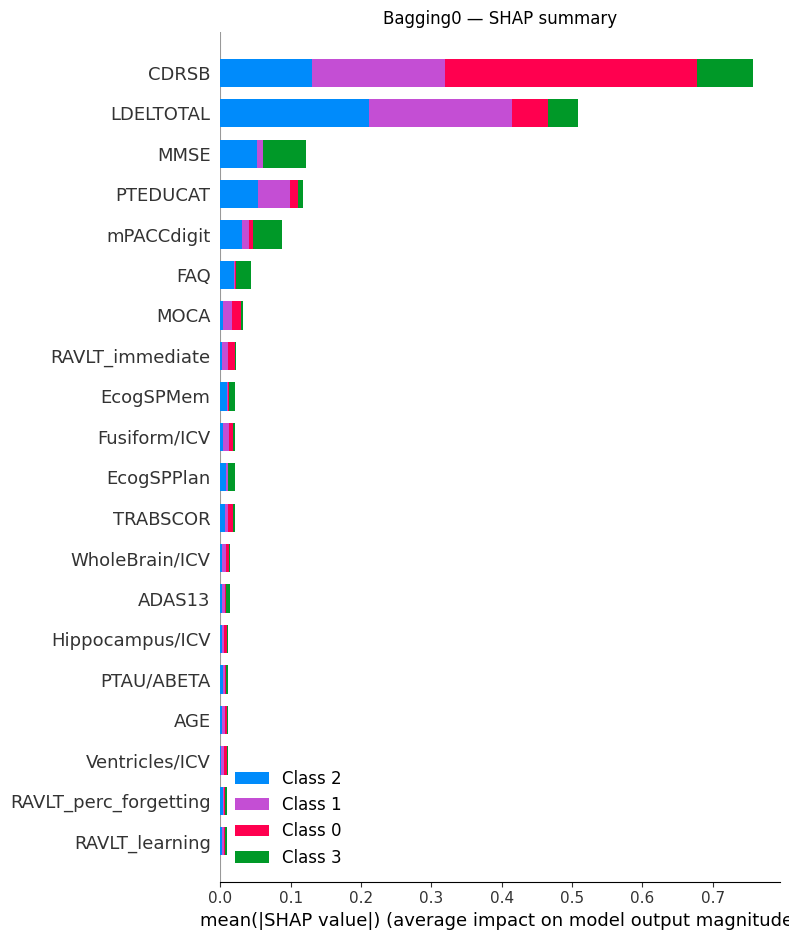

PermutationExplainer explainer: 1935it [1:04:43,  2.01s/it]                          


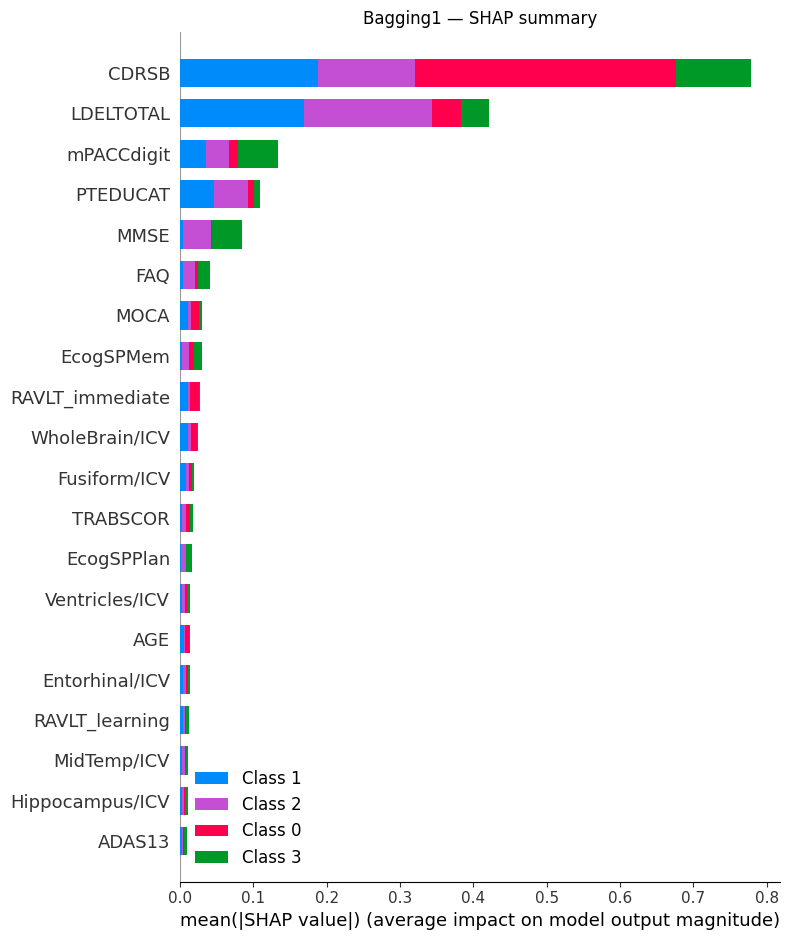

PermutationExplainer explainer: 1935it [02:21, 12.71it/s]                          


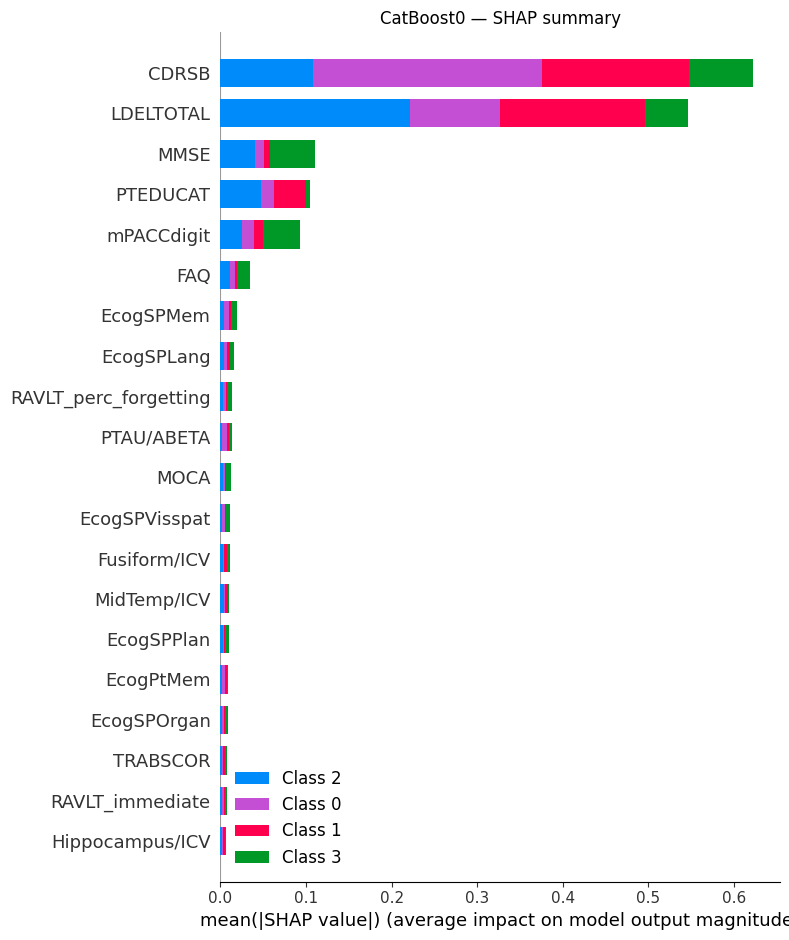

PermutationExplainer explainer: 1935it [02:21, 12.74it/s]                          


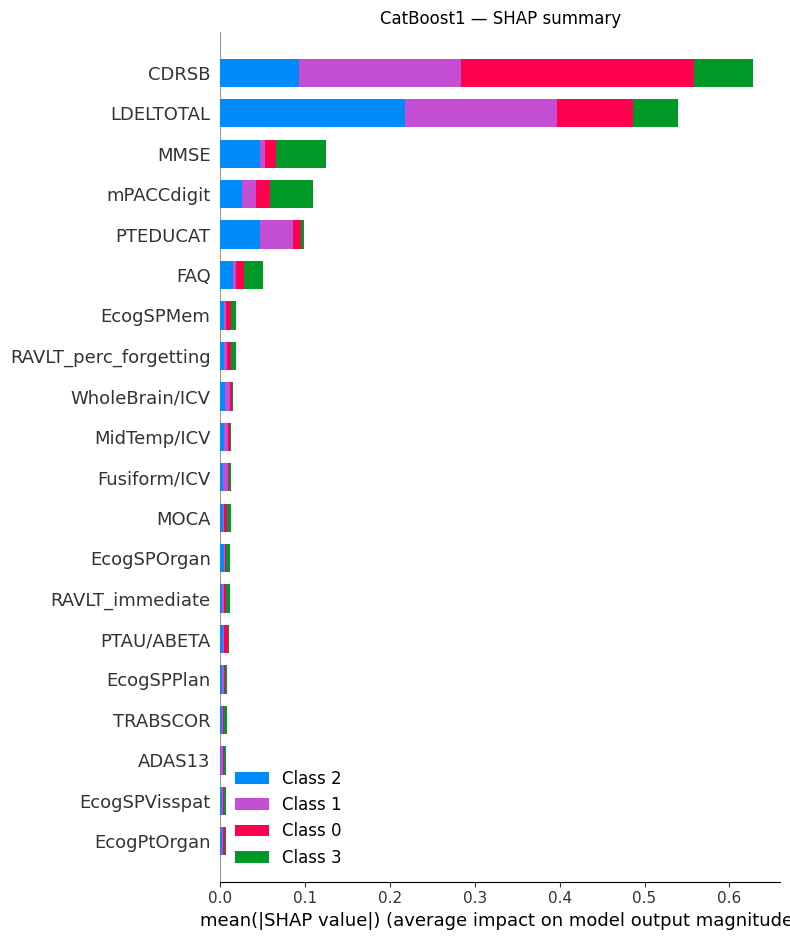

PermutationExplainer explainer: 1935it [00:56, 27.54it/s]                          


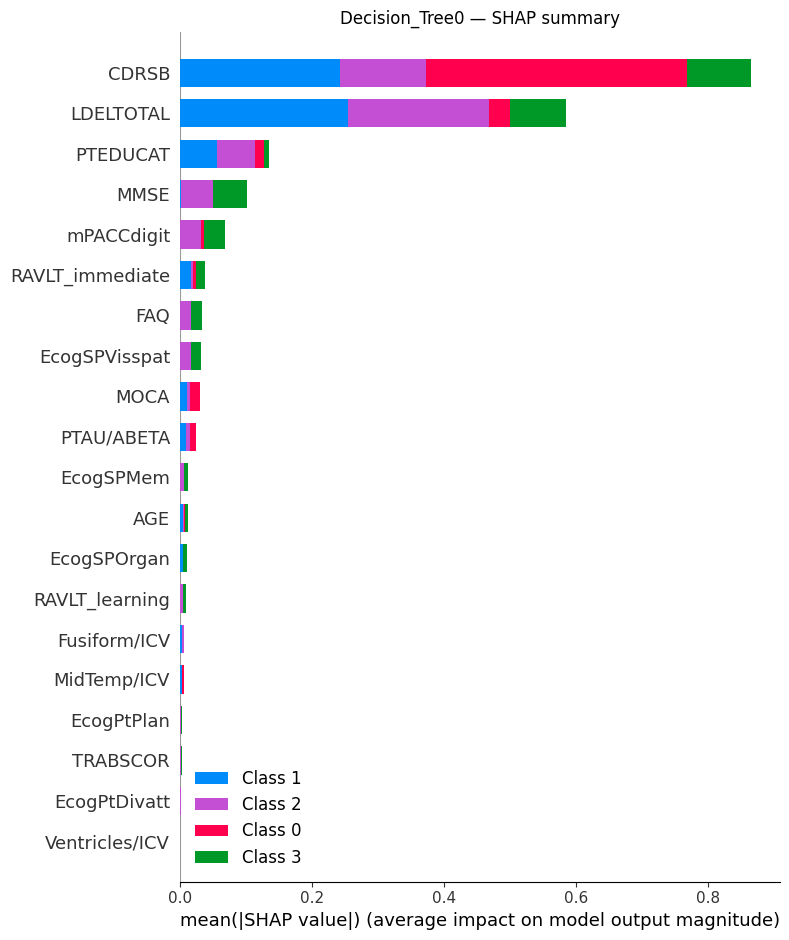

PermutationExplainer explainer: 1935it [01:13, 22.11it/s]                          


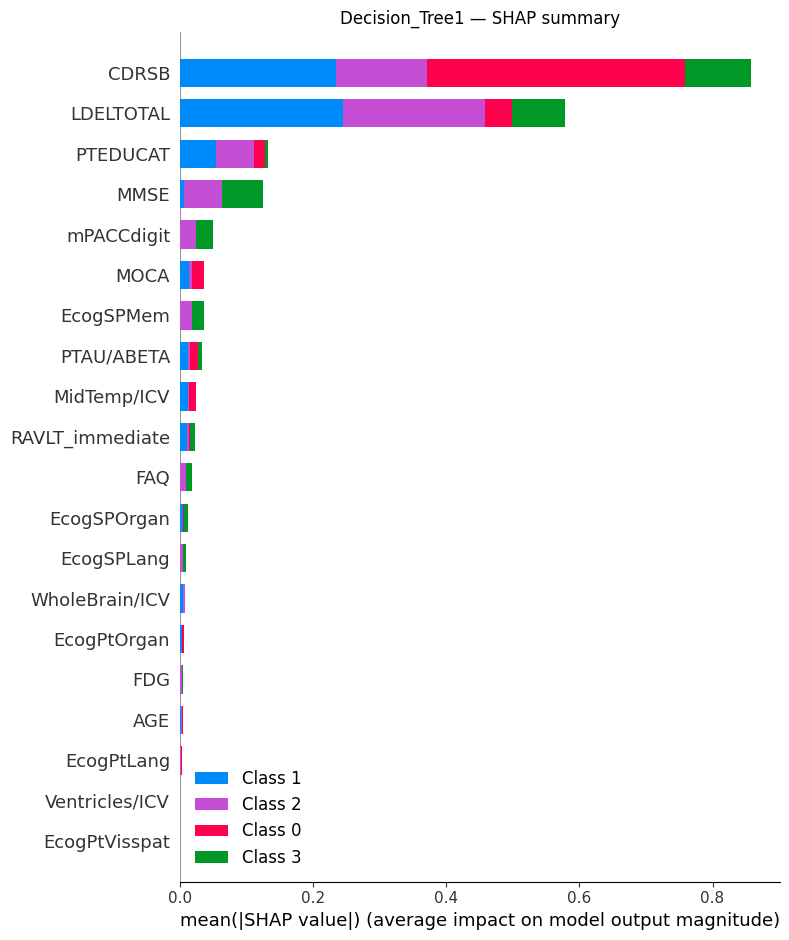

PermutationExplainer explainer: 1935it [13:02,  2.44it/s]                          


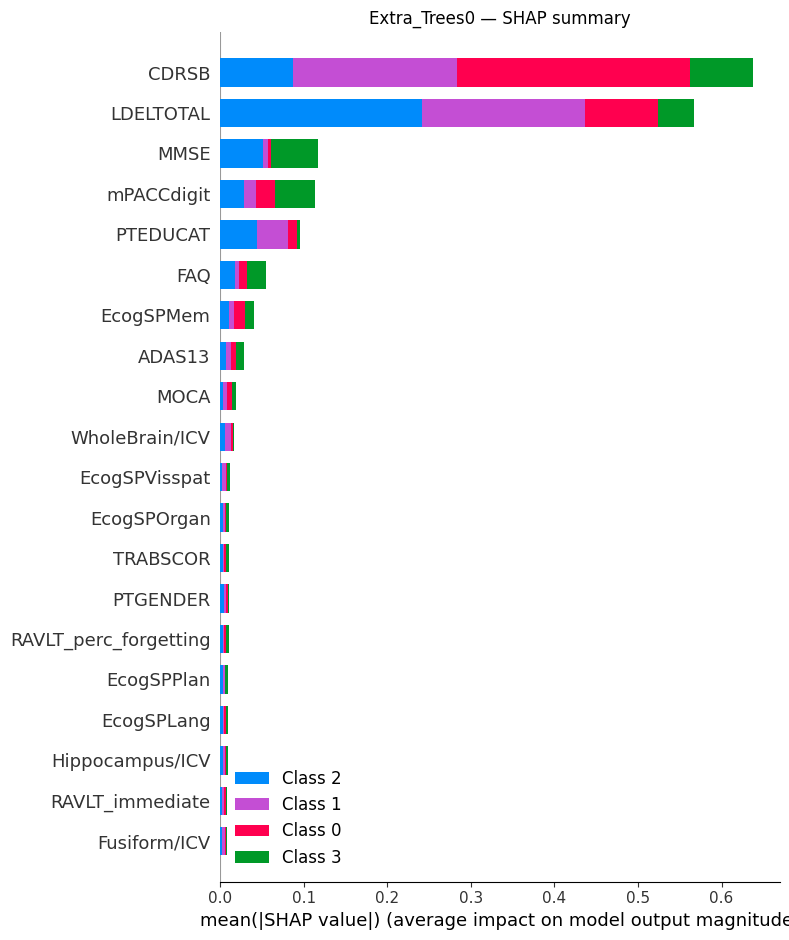

PermutationExplainer explainer: 1935it [11:52,  2.68it/s]                          


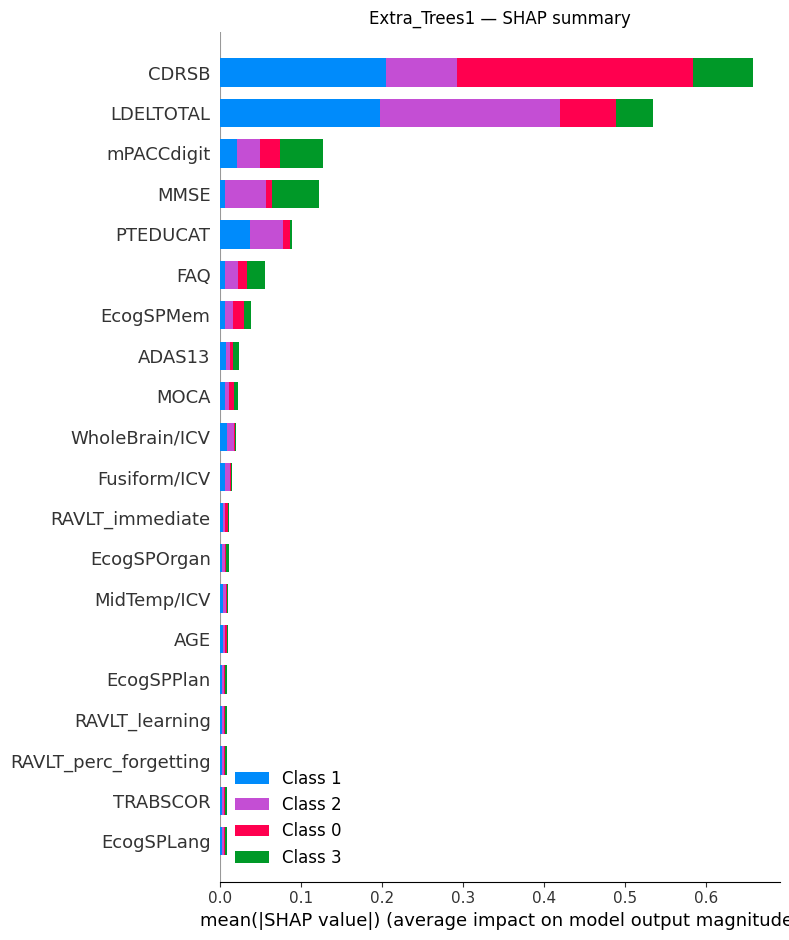

PermutationExplainer explainer: 1935it [08:36,  3.68it/s]                          


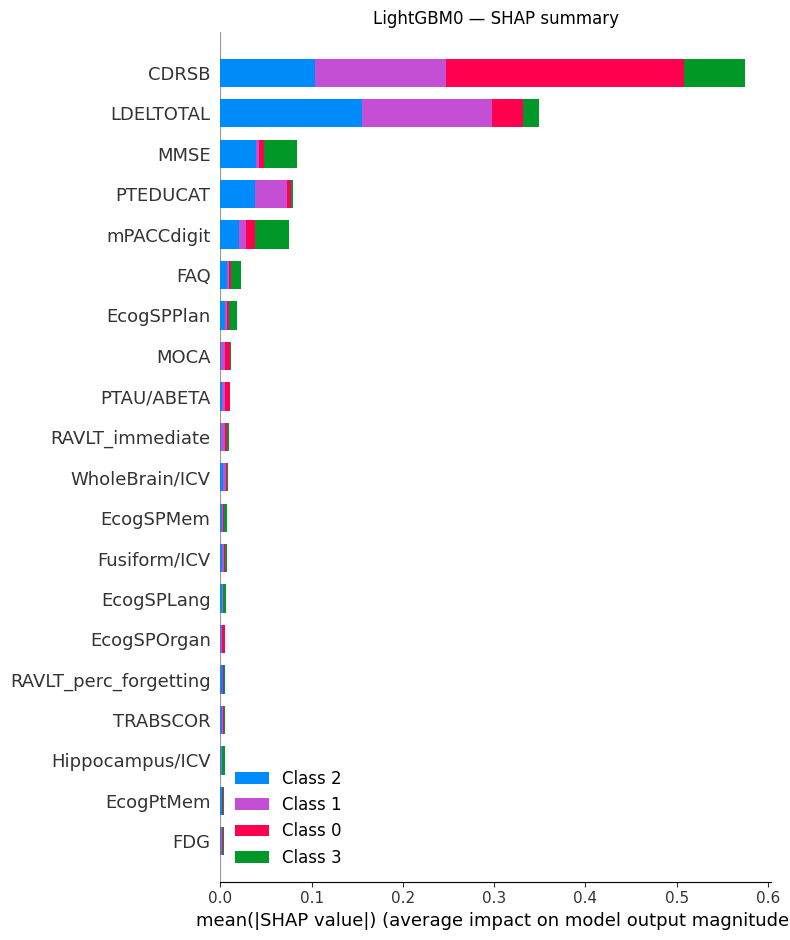

PermutationExplainer explainer: 1935it [07:36,  4.14it/s]                          


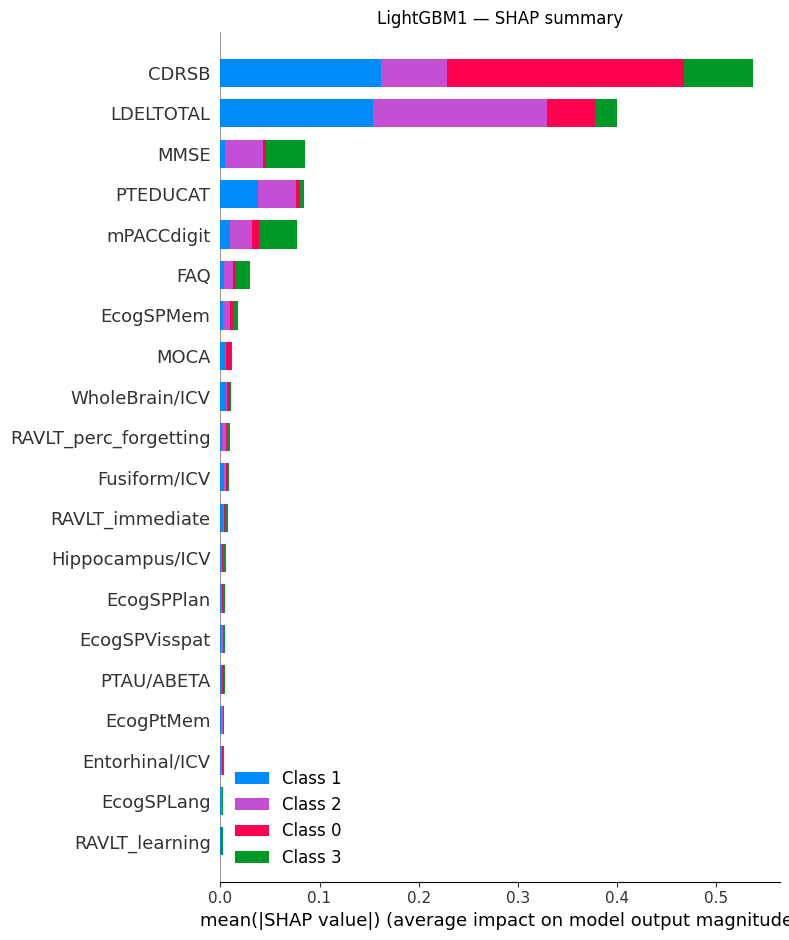

PermutationExplainer explainer: 1935it [01:30, 18.85it/s]                          


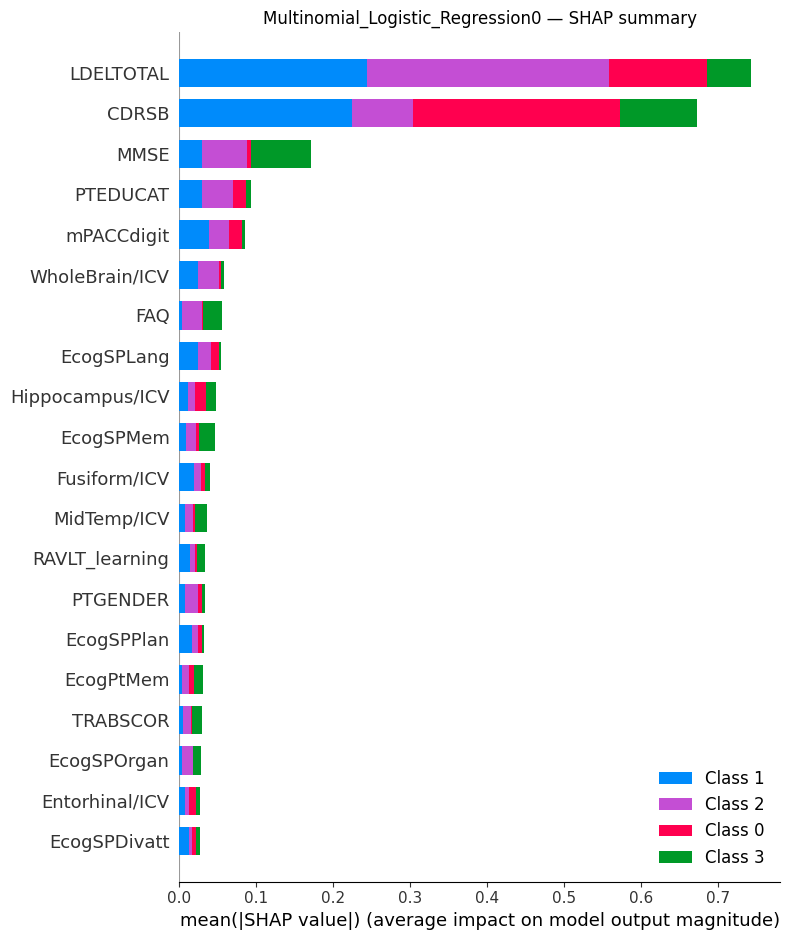

PermutationExplainer explainer: 1935it [01:32, 18.38it/s]                          


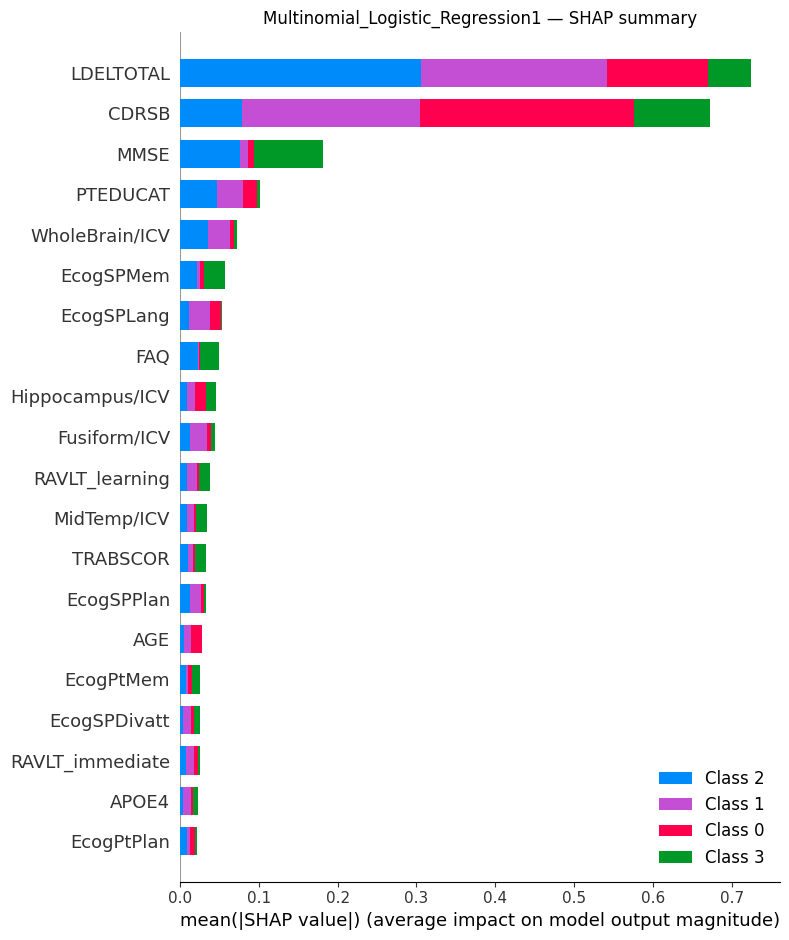

PermutationExplainer explainer: 1935it [12:53,  2.46it/s]                          


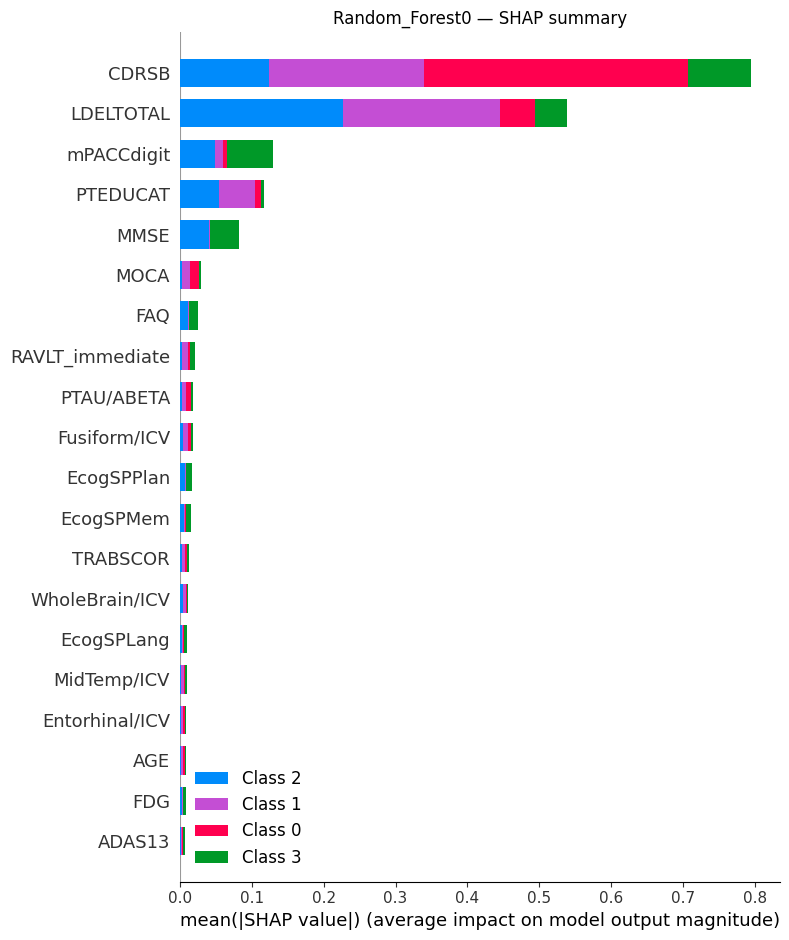

PermutationExplainer explainer: 1935it [14:13,  2.23it/s]                          


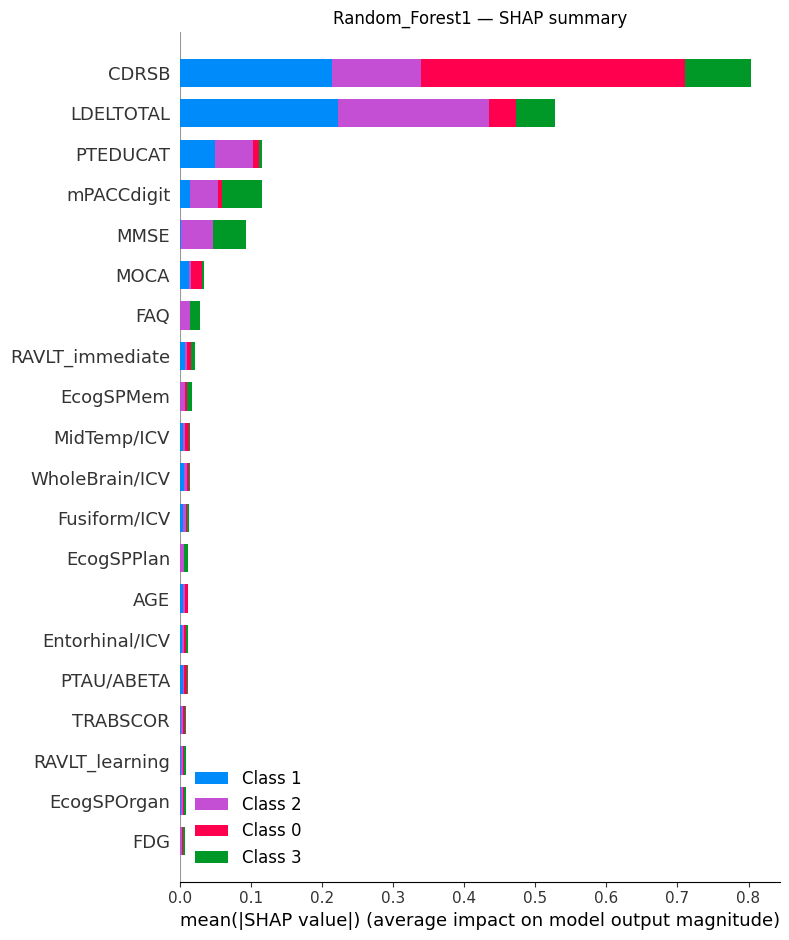

PermutationExplainer explainer: 1935it [04:56,  6.26it/s]                          


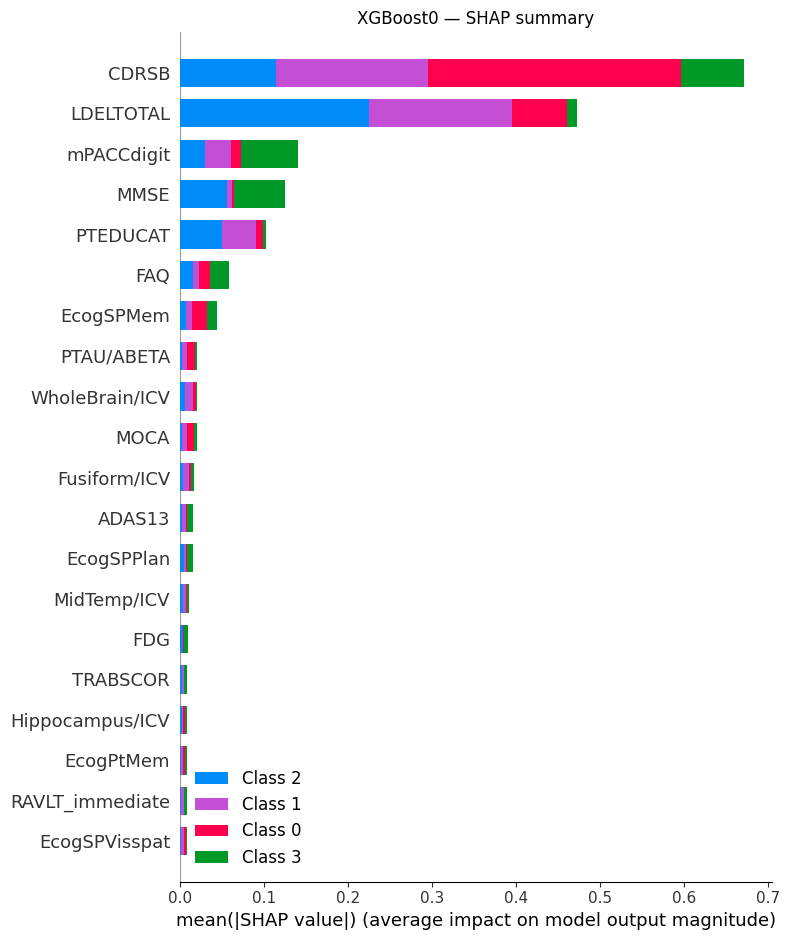

PermutationExplainer explainer: 1935it [03:52,  7.97it/s]                          


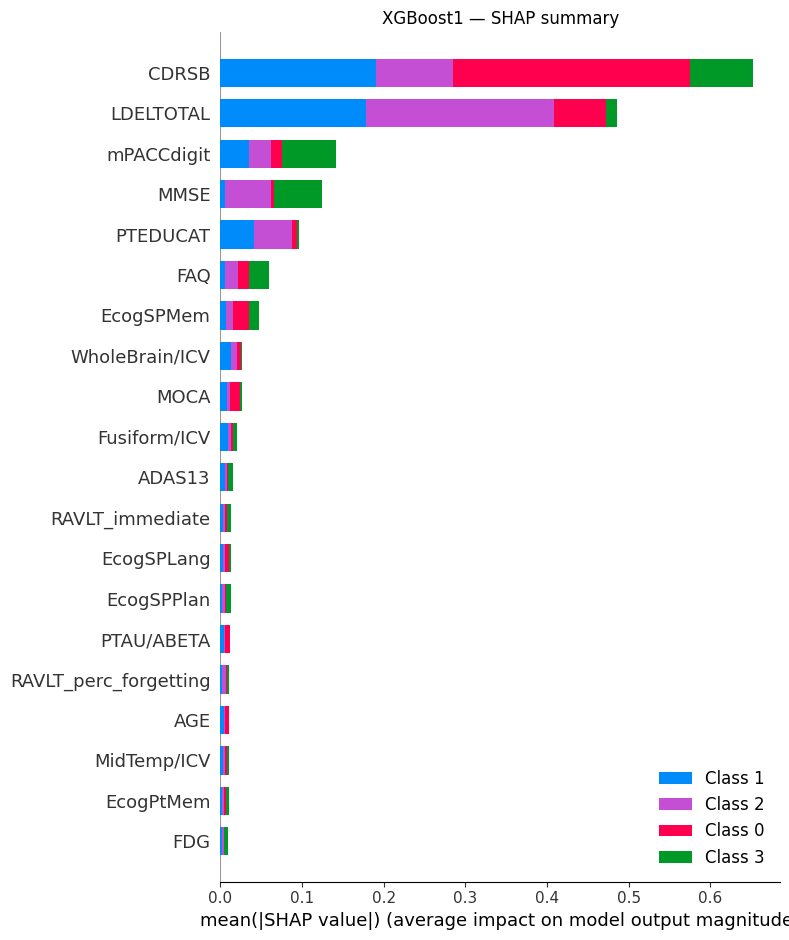

In [2]:
# Load models from folder
models_dir = "../results/all_models/1"
models = []

for fname in os.listdir(models_dir):
    if fname.endswith(".pkl"):  
        model_path = os.path.join(models_dir, fname)
        try:
            model = joblib.load(model_path)
            model_name = os.path.splitext(fname)[0]
            models.append((model_name, model))
            print(f"Loaded model: {model_name}")
        except Exception as e:
            print(f"Could not load {fname}: {e}")

rng = np.random.default_rng(0) # create an explicit generator

# Initialize ModelExplainer
explainer1 = ModelExplainer(
    models=models,
    X_train=X_train,
    y_train=y_train,
    feature_names=list(X_train.columns),
    class_names=np.unique(y_train).tolist(),
    random_state=rng
)

# Generate SHAP summary plots
explainer1.shap_summary_plots()

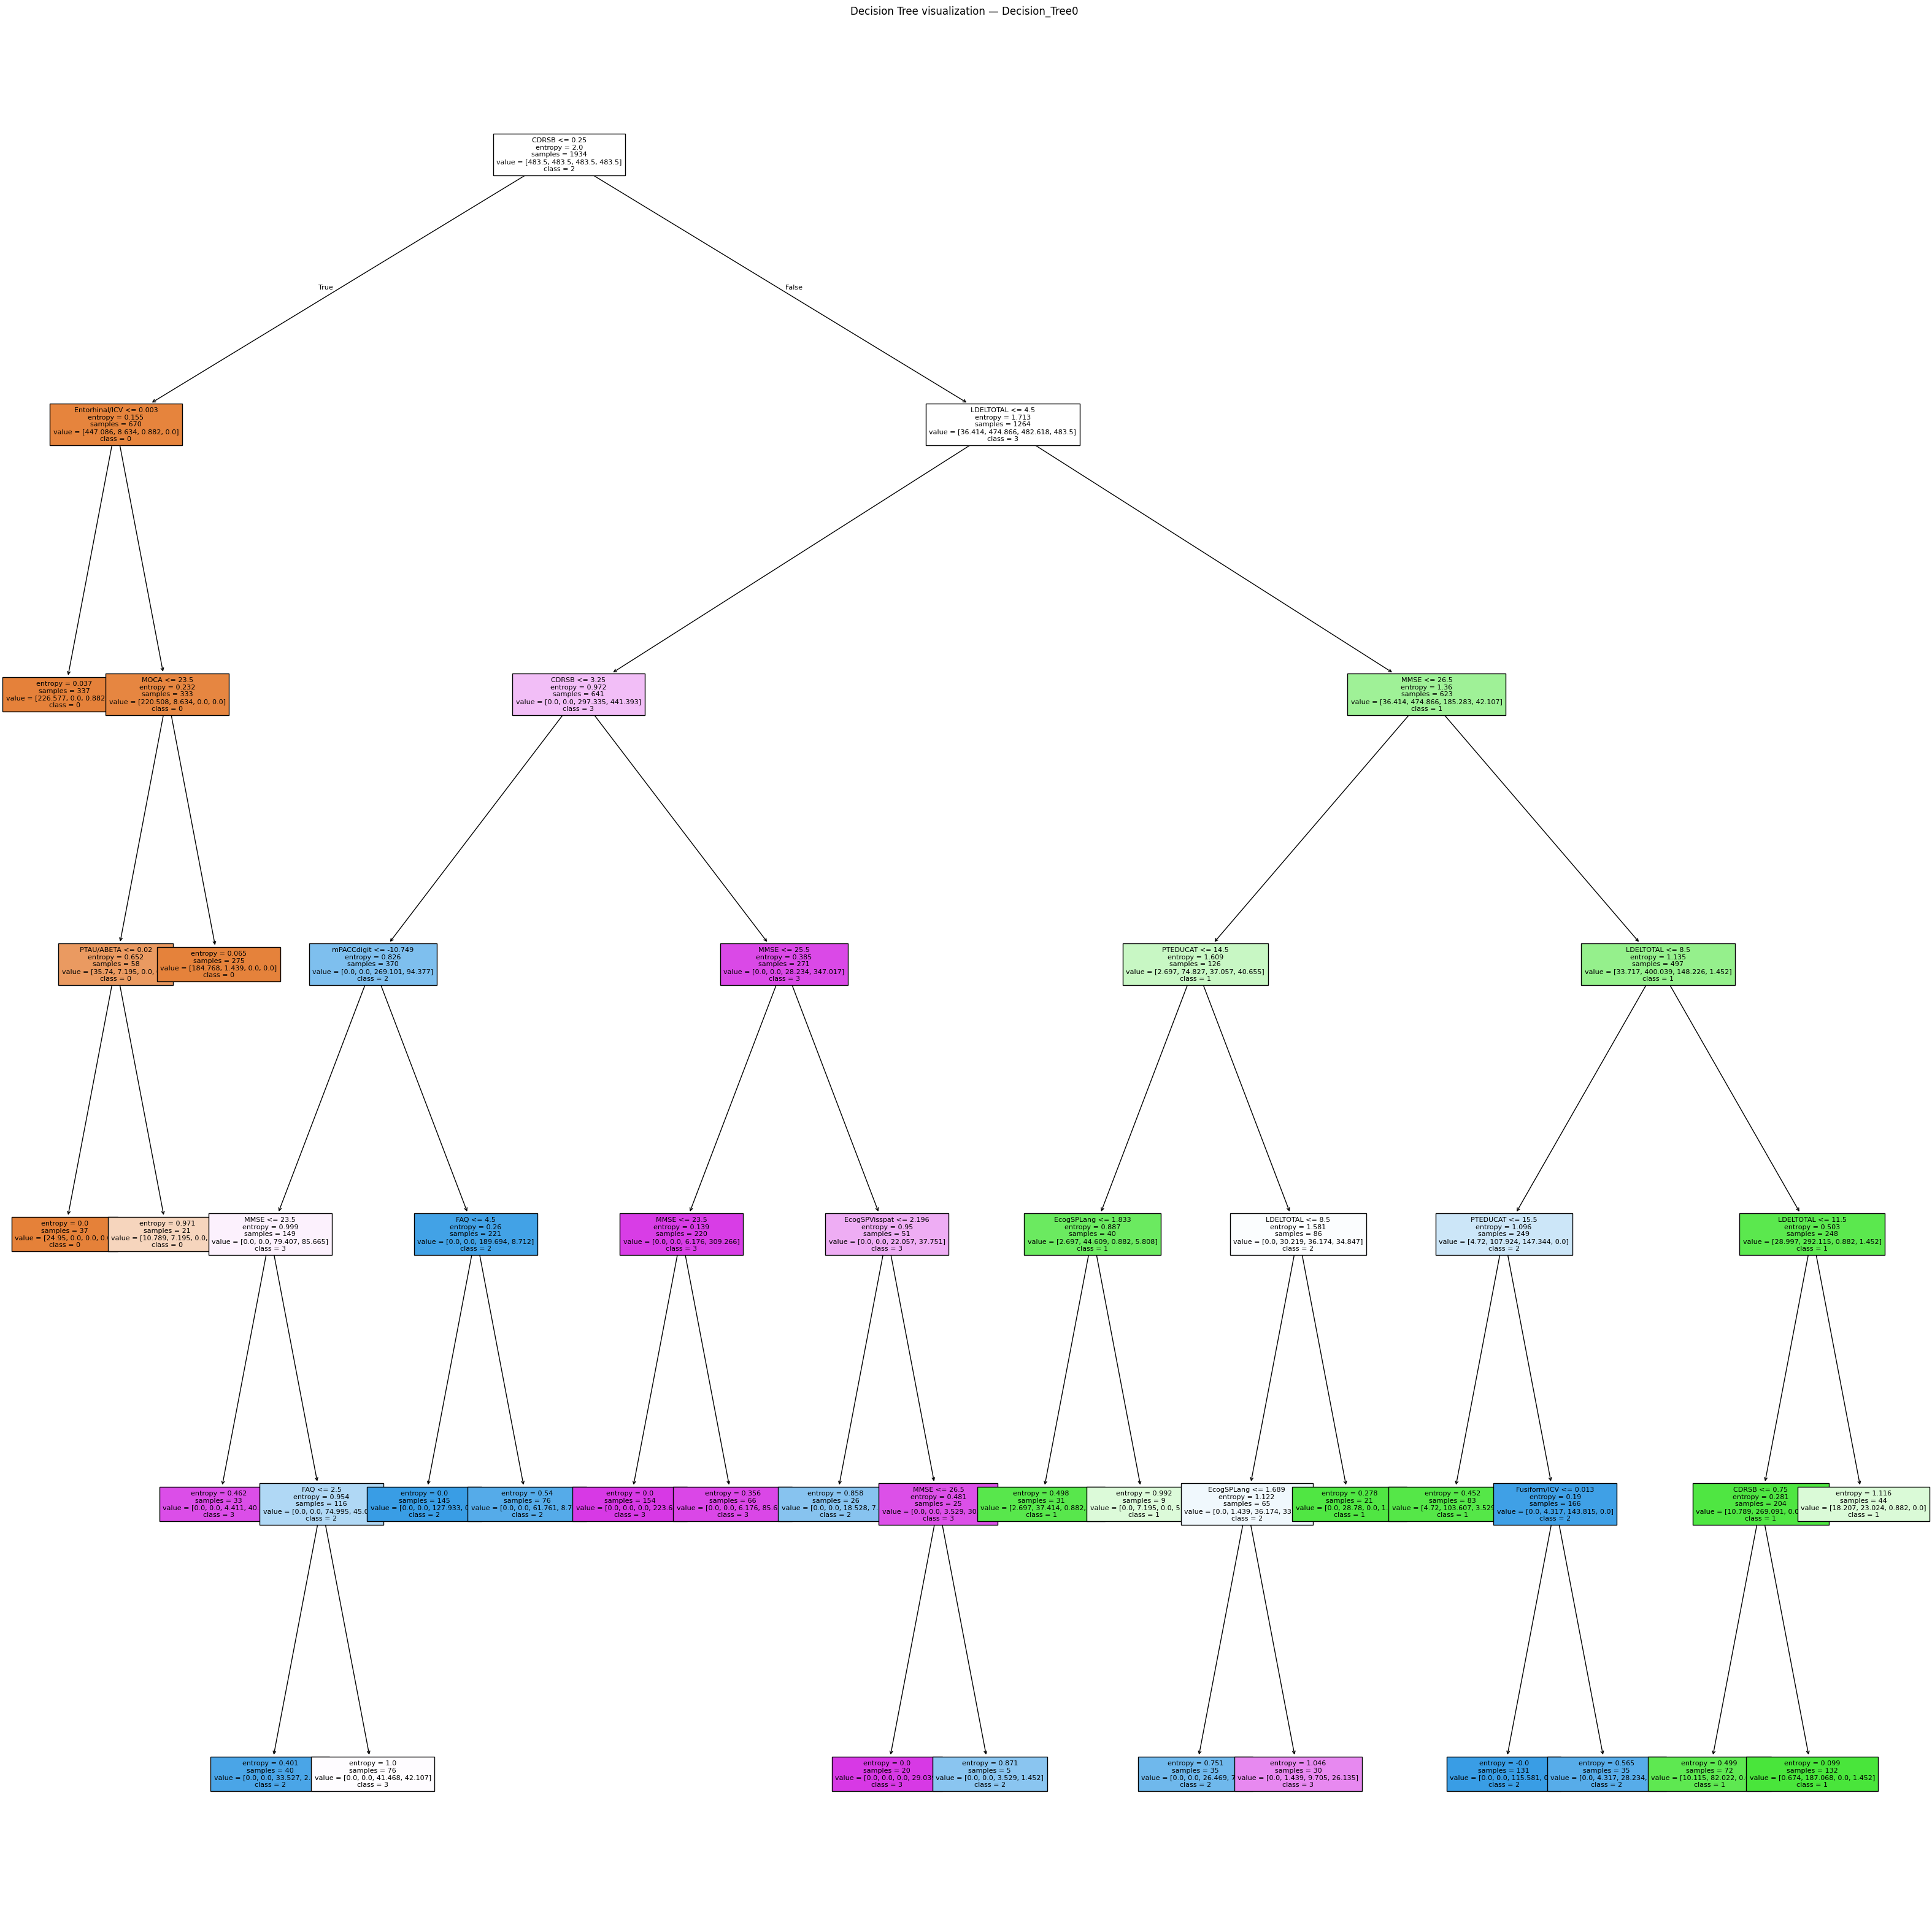

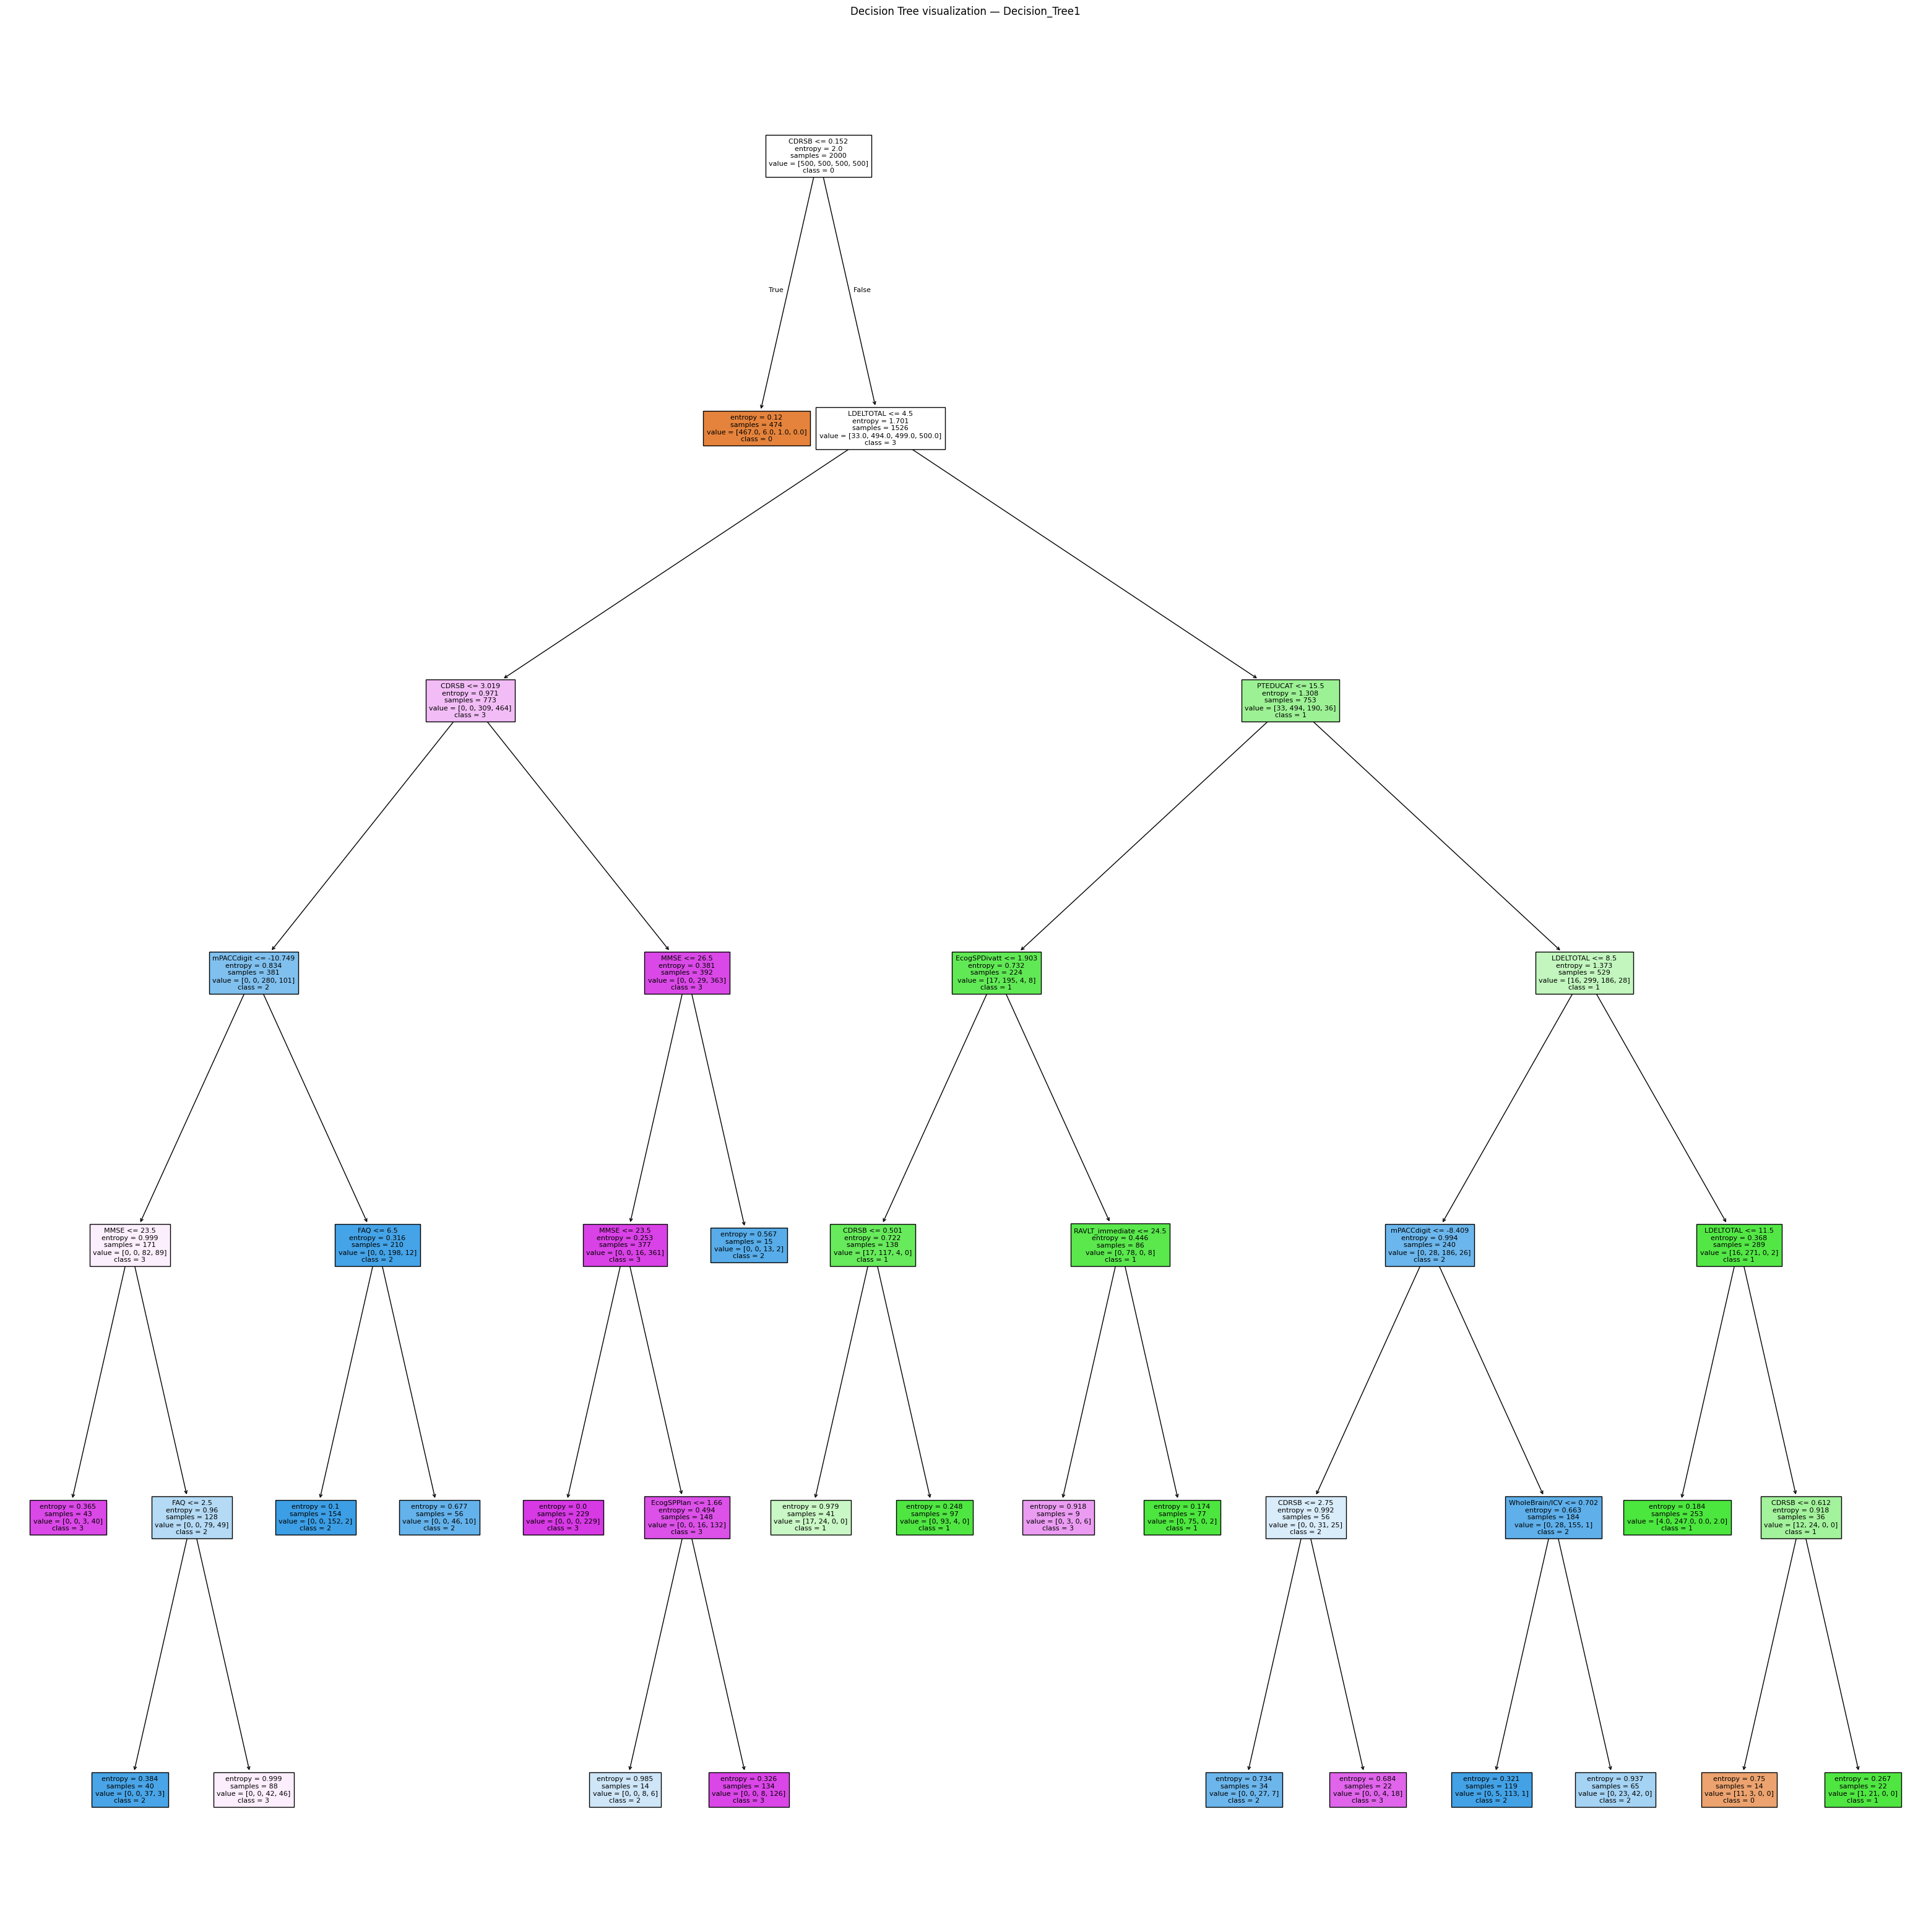

In [3]:
# Generate SHAP summary plots
explainer1.plot_decision_trees(fontsize=8)

In the first group of models, it is clear that `CDRSB`, `LDELTOTAL`, and `mPACCdigit` are the dominant features. The **SHAP** plots show that `CDRSB` is often the most important feature for distinguishing diagnostic classes, followed by `LDELTOTAL` and then `mPACCdigit`.

The other attributes still play a role, but with less weight and are complementary:
- `MMSE` and `FAQ`, and  provide additional contributions in several models combined, such as Random Forest and Extra Trees.
- `AGE` and `PTEDUCAT` a marginal role, but appear in linear models (multinomial logistic regression) where each variable is more explicitly weighted.
- In the boosting models (**CatBoost**, **LightGBM**, **XGBoost**), the main features still have a very strong effect, but nonlinear combinations with other variables (e.g., `FAQ`) are observed to improve classification.

**The SHAP summary plots also show that the direction of the effect is consistent: worse scores push the prediction toward higher severity classes.**

Regarding the displayed decision trees, note that `CDRSB` almost always appears as the initial split, sometimes followed by `LDELTOTAL`. This reflects the fact that the model immediately attempts to separate patients based on these highly discriminatory clinical indicators.*PDF versions in "results" folder are more readable*.

## Dataset without `CDRSB`, `LDELTOTAL`, and `mPACCdigit` with Classification

Loaded model: Bagging0
Loaded model: Bagging1
Loaded model: CatBoost0
Loaded model: CatBoost1
Loaded model: Decision_Tree0
Loaded model: Decision_Tree1
Loaded model: Extra_Trees0
Loaded model: Extra_Trees1
Loaded model: LightGBM0
Loaded model: LightGBM1
Loaded model: Multinomial_Logistic_Regression0
Loaded model: Multinomial_Logistic_Regression1
Loaded model: Random_Forest0
Loaded model: Random_Forest1
Loaded model: XGBoost0
Loaded model: XGBoost1


PermutationExplainer explainer: 1935it [59:06,  1.84s/it]                          


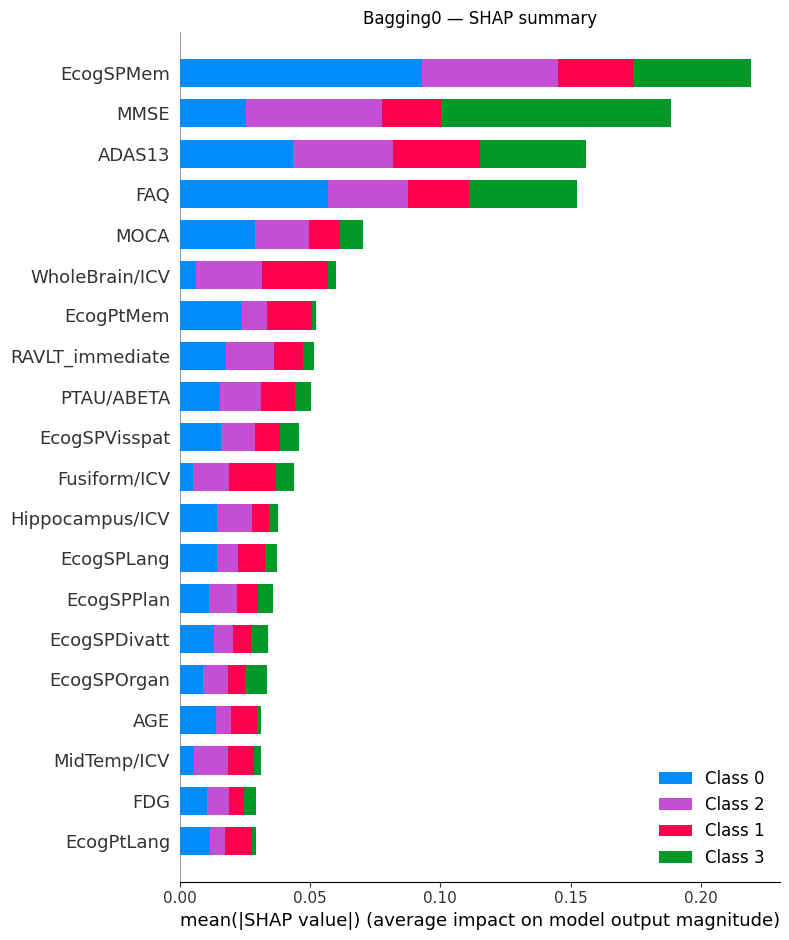

PermutationExplainer explainer: 1935it [59:09,  1.84s/it]                           


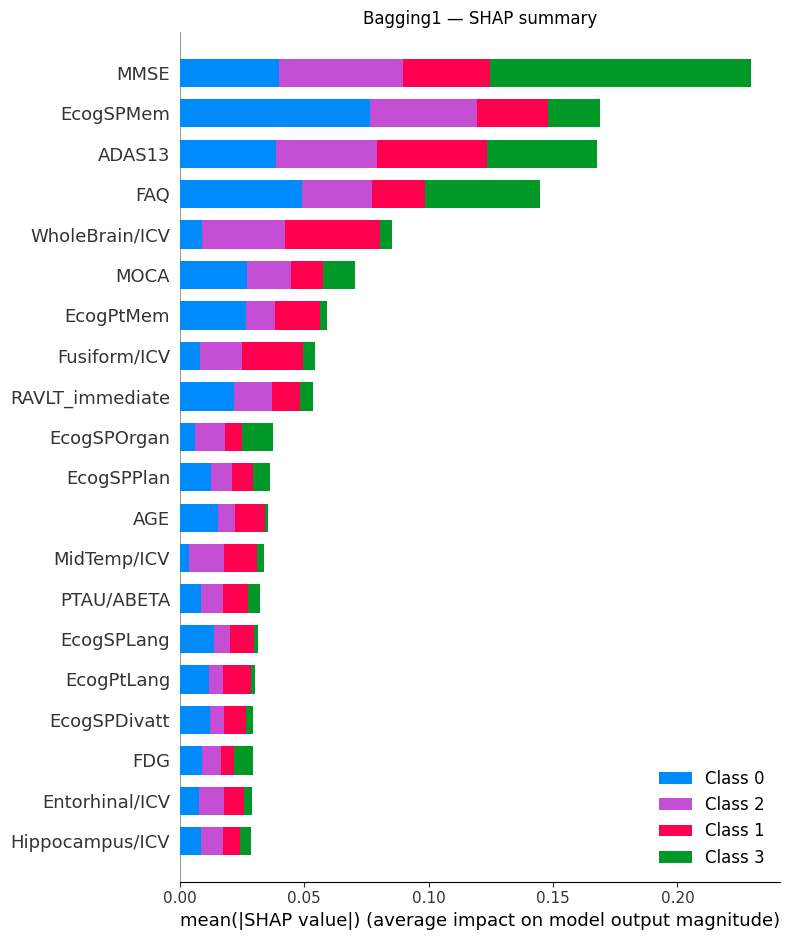

PermutationExplainer explainer: 1935it [02:56, 10.28it/s]                          


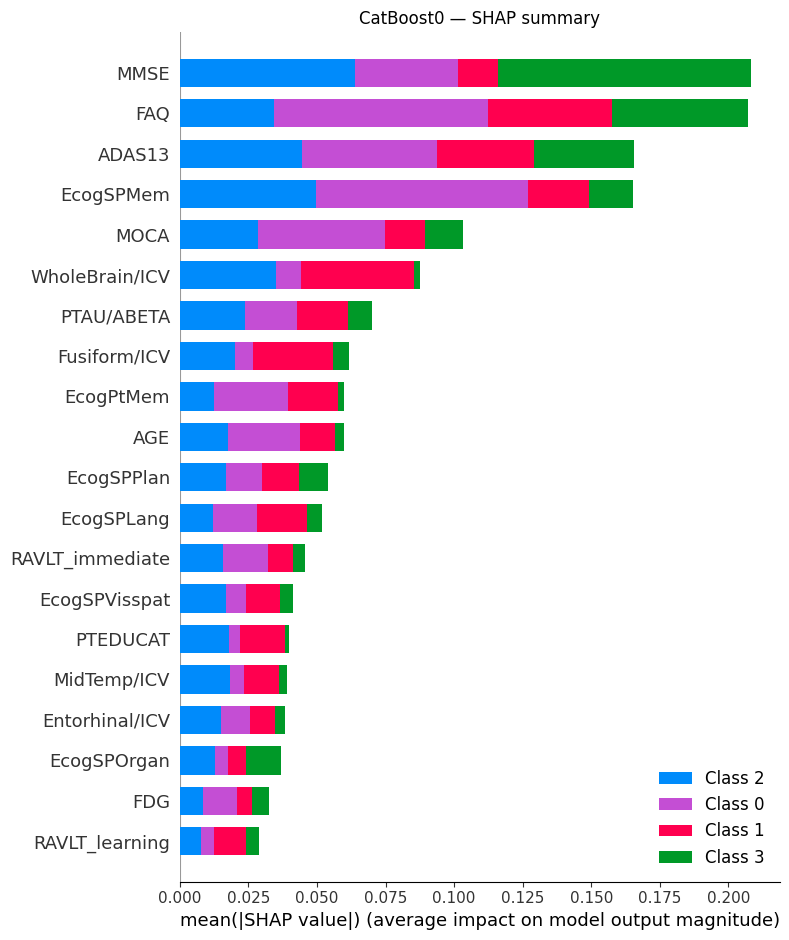

PermutationExplainer explainer: 1935it [03:04,  9.92it/s]                          


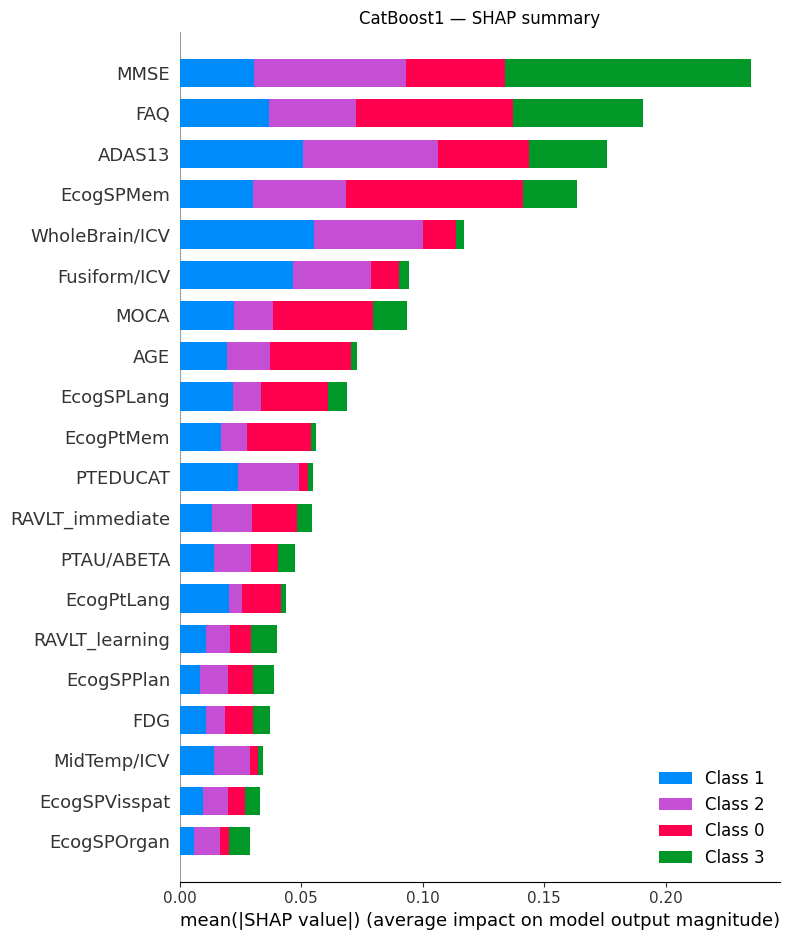

PermutationExplainer explainer: 1935it [01:13, 22.37it/s]                          


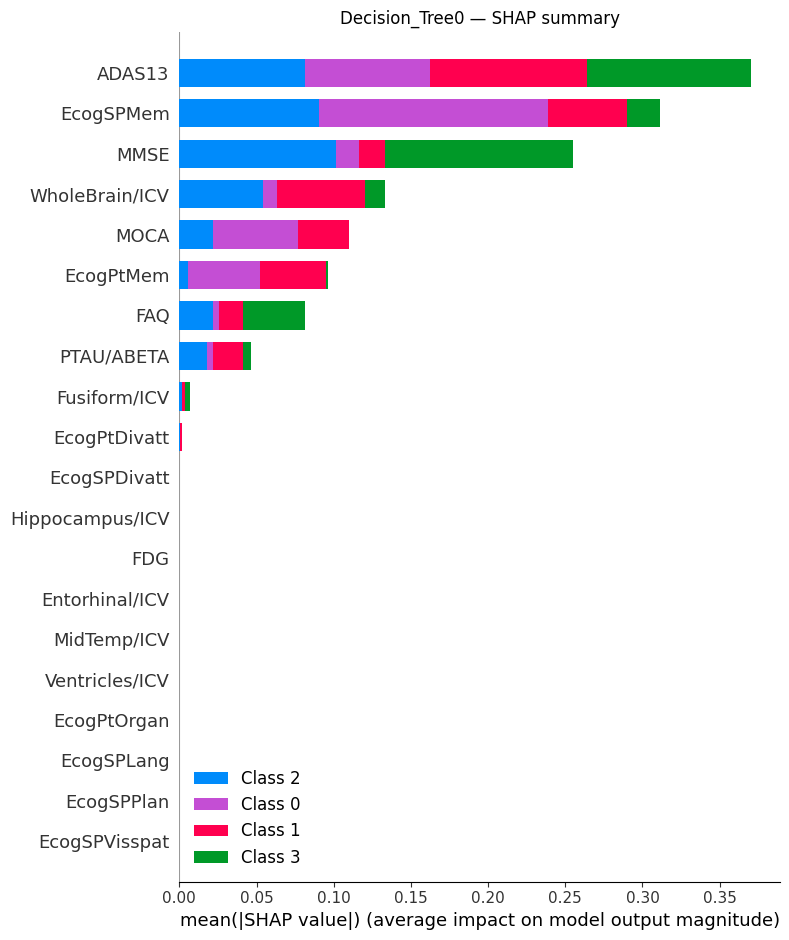

PermutationExplainer explainer: 1935it [01:14, 22.32it/s]                          


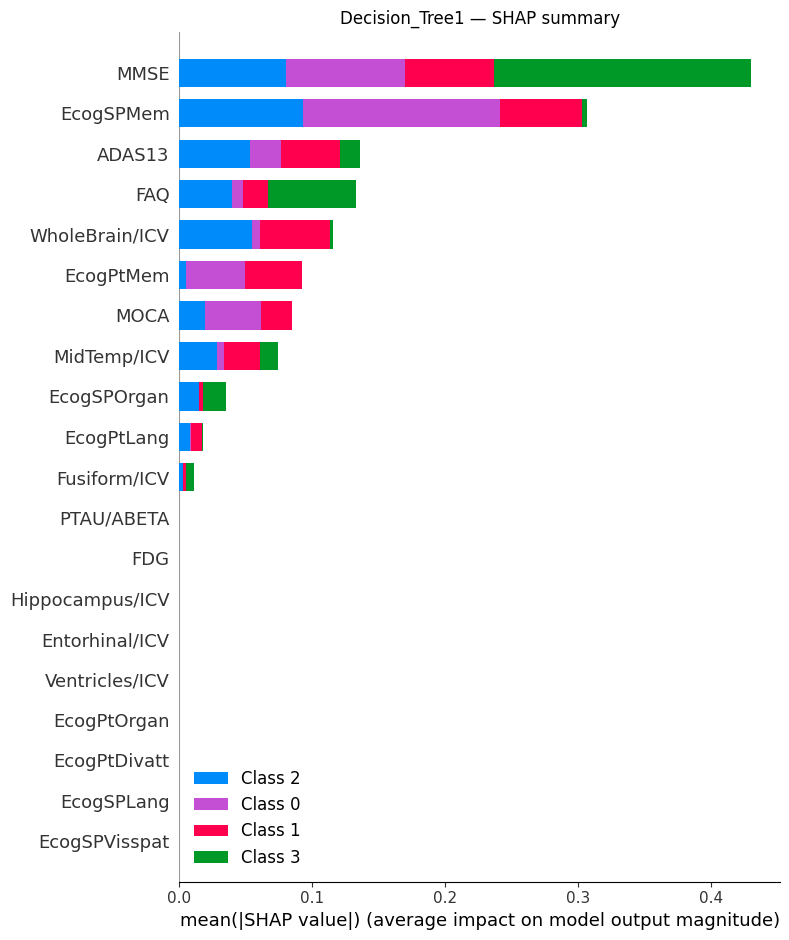

PermutationExplainer explainer: 1935it [10:32,  3.02it/s]                          


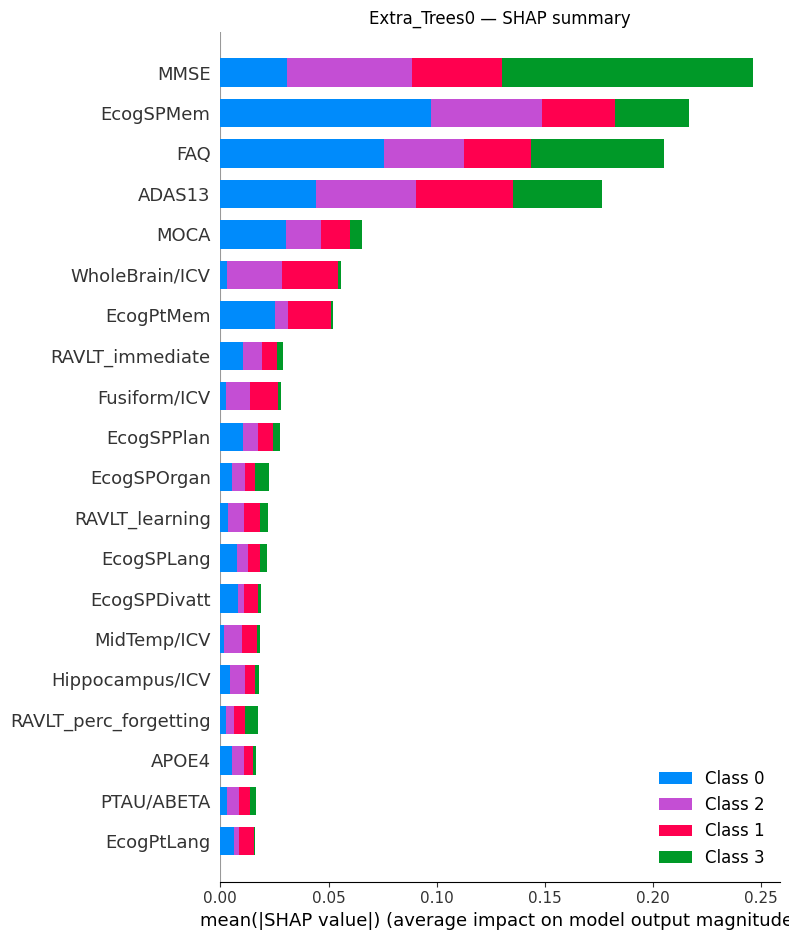

PermutationExplainer explainer: 1935it [09:27,  3.35it/s]                          


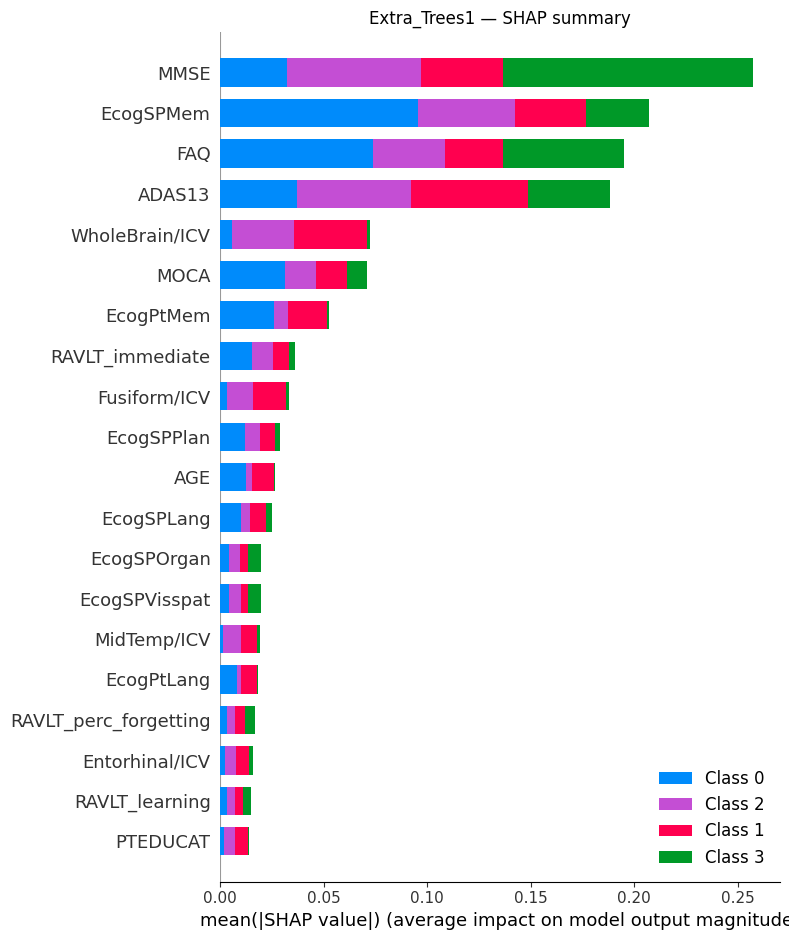

PermutationExplainer explainer: 1935it [13:11,  2.41it/s]                          


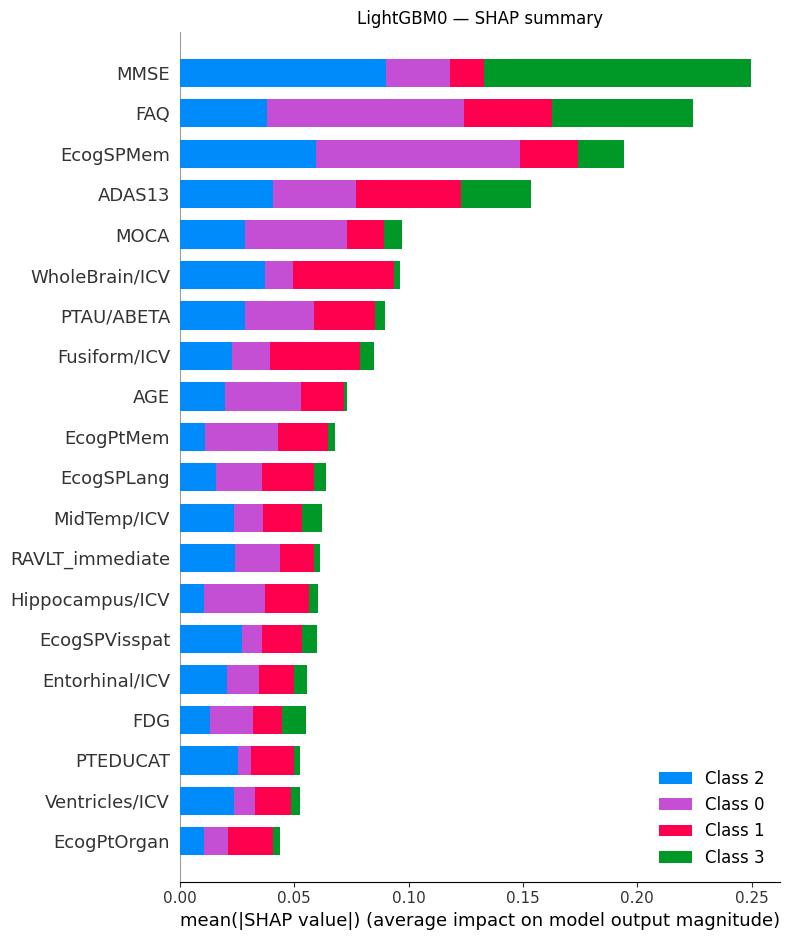

PermutationExplainer explainer: 1935it [13:04,  2.44it/s]                          


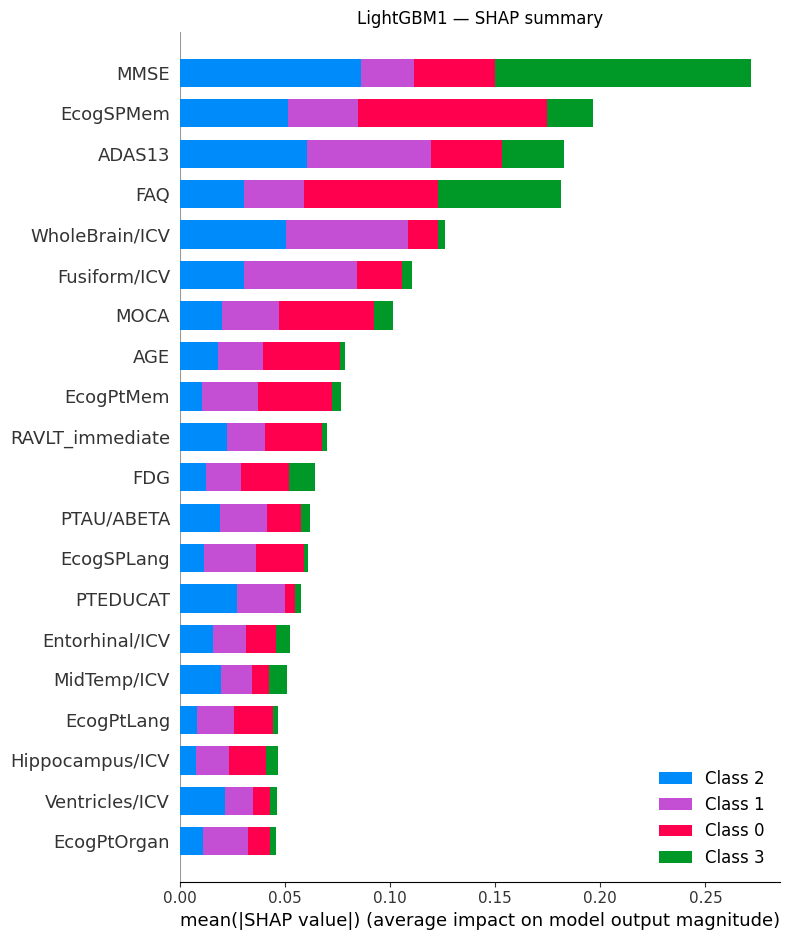

PermutationExplainer explainer: 1935it [01:27, 19.71it/s]                          


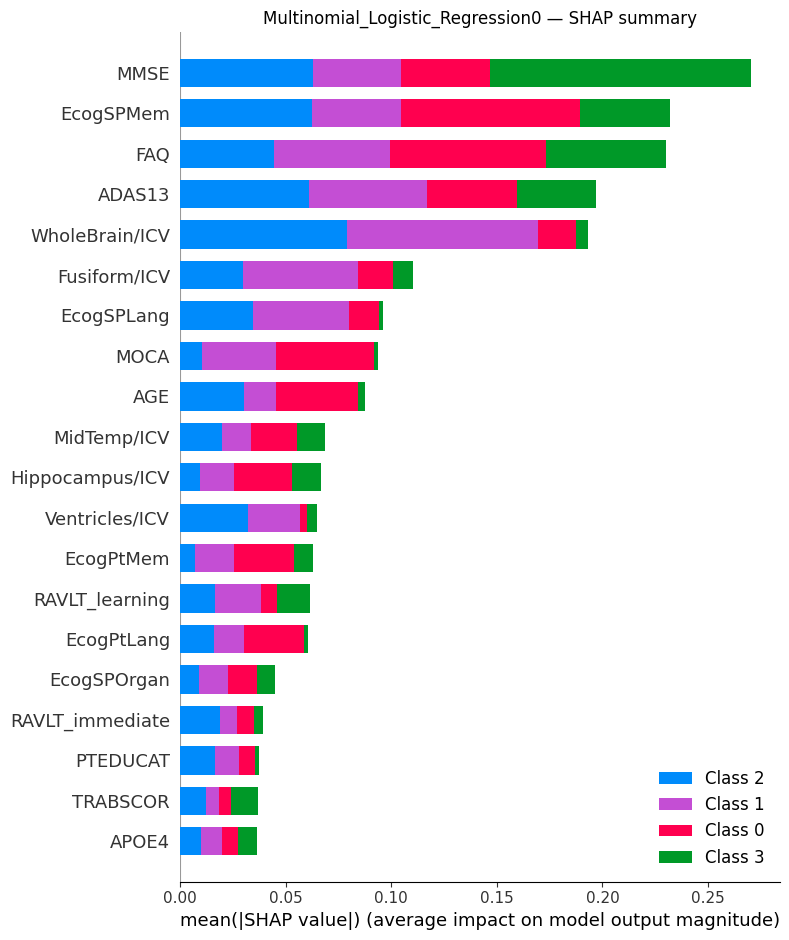

PermutationExplainer explainer: 1935it [01:26, 19.74it/s]                          


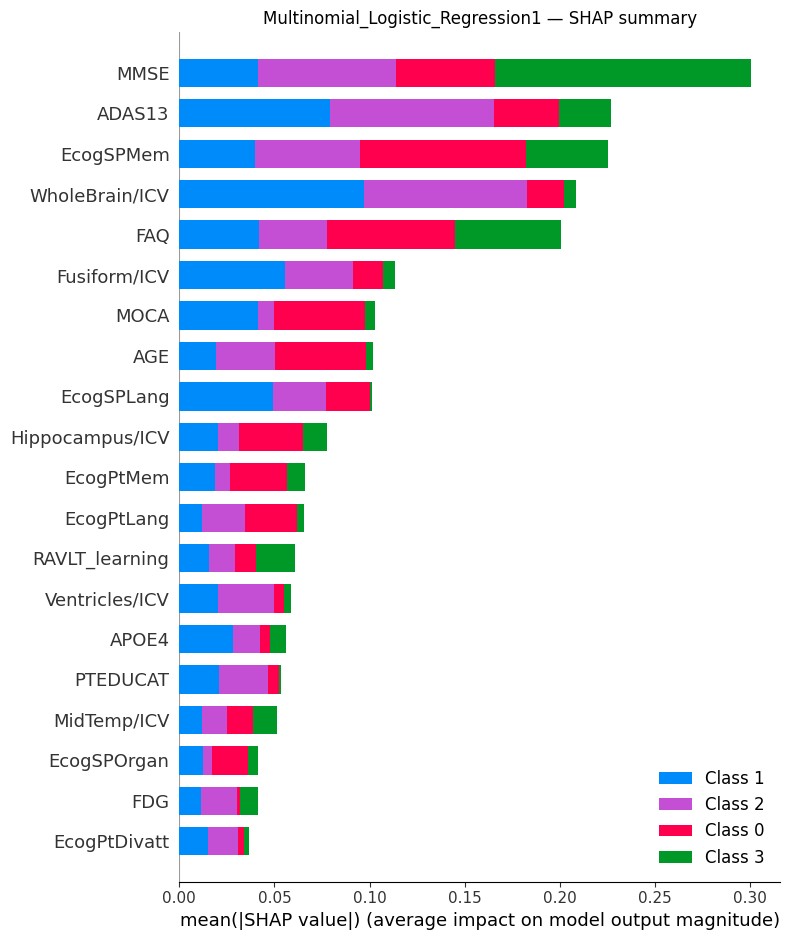

PermutationExplainer explainer: 1935it [1:06:45,  2.11s/it]                            


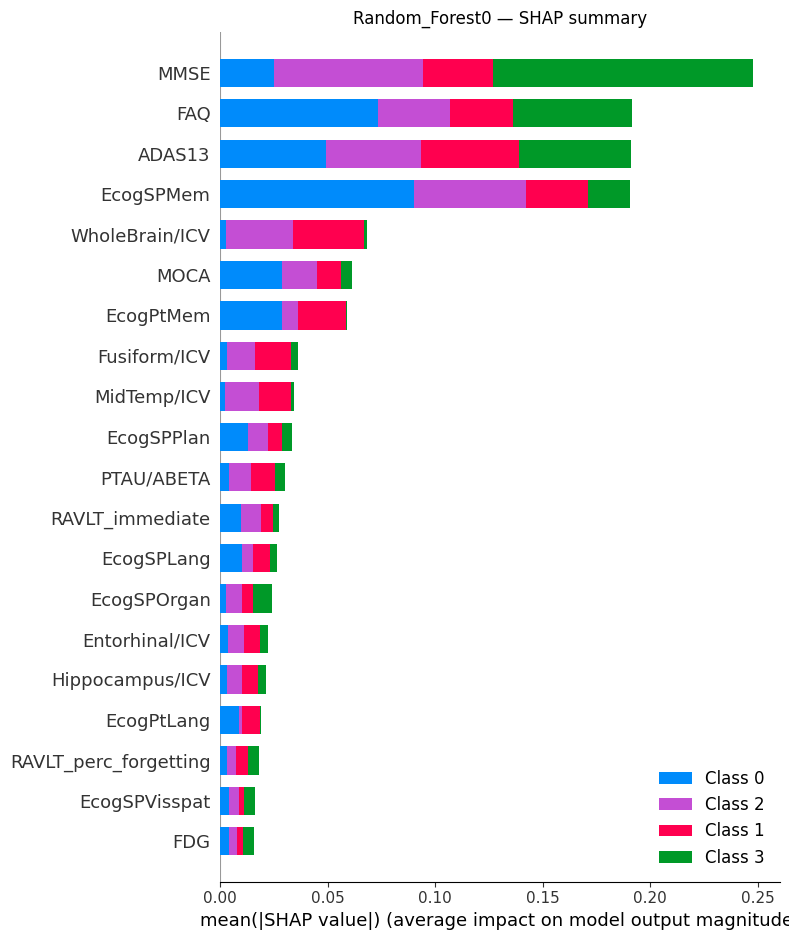

PermutationExplainer explainer: 1935it [14:09,  2.26it/s]                          


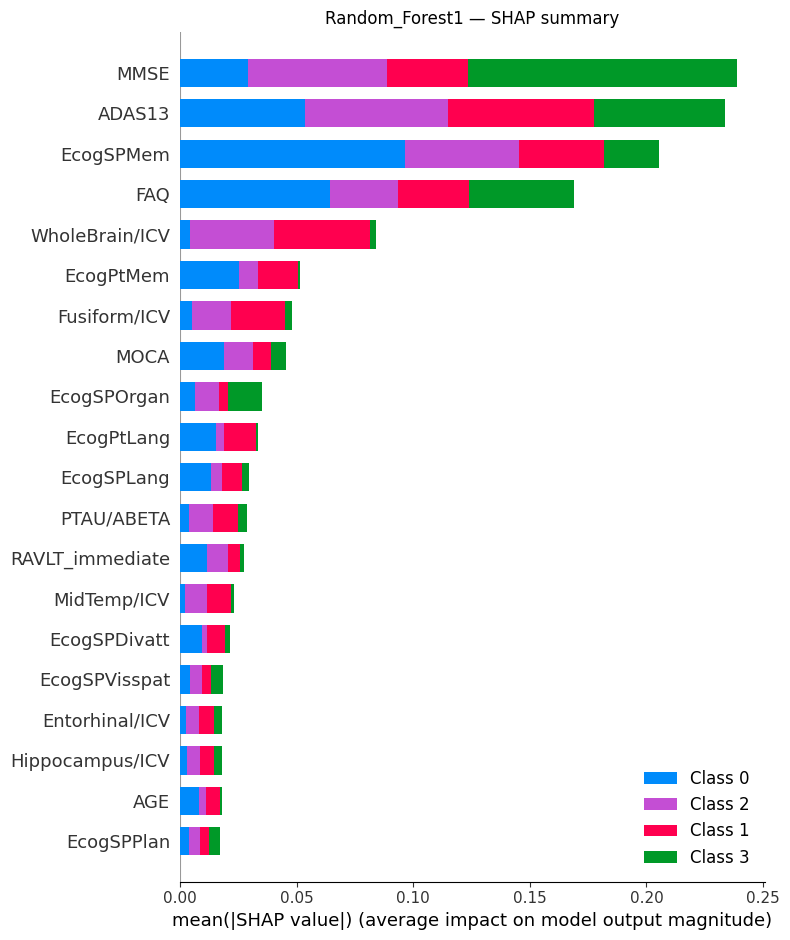

PermutationExplainer explainer: 1935it [05:01,  6.31it/s]                          


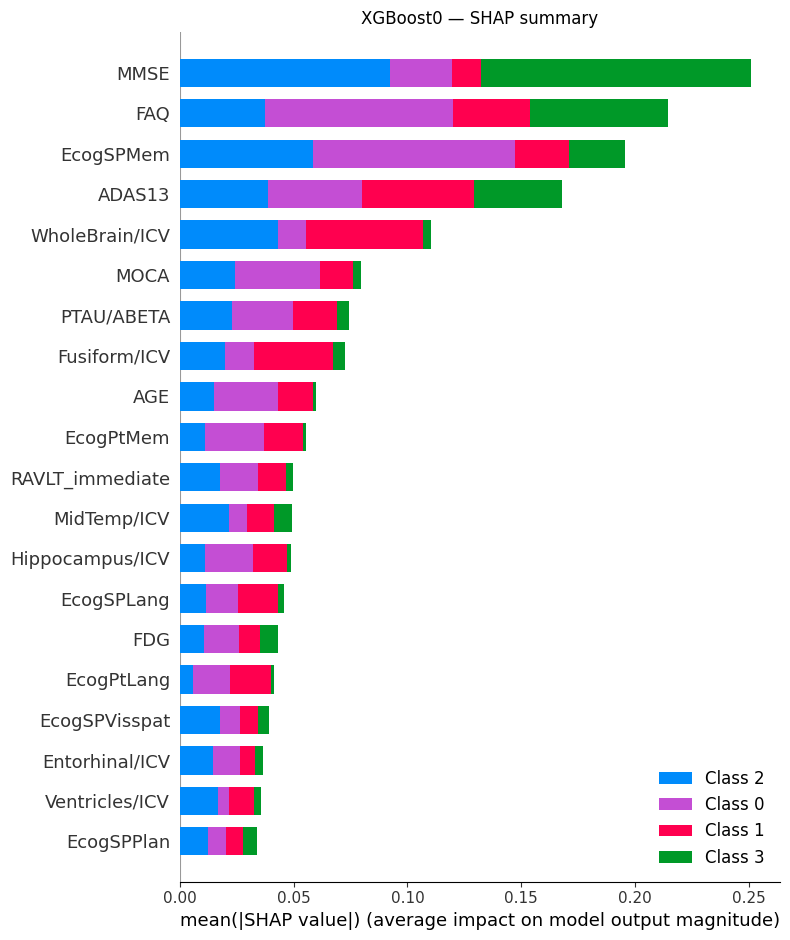

PermutationExplainer explainer: 1935it [04:50,  6.55it/s]                          


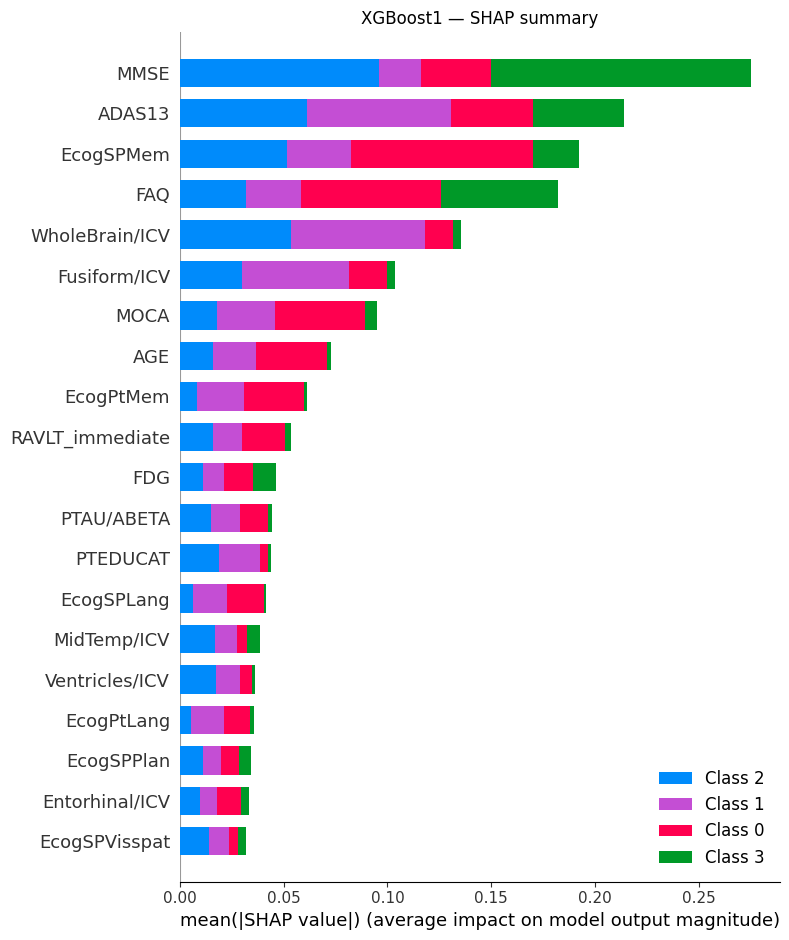

In [3]:
X_train.drop(columns=['CDRSB', 'LDELTOTAL', 'mPACCdigit'], axis=1, inplace=True)

# Load models from folder
models_dir = "../results/all_models/2"
models = []

for fname in os.listdir(models_dir):
    if fname.endswith(".pkl"):  
        model_path = os.path.join(models_dir, fname)
        try:
            model = joblib.load(model_path)
            model_name = os.path.splitext(fname)[0]
            models.append((model_name, model))
            print(f"Loaded model: {model_name}")
        except Exception as e:
            print(f"Could not load {fname}: {e}")

rng = np.random.default_rng(0) # create an explicit generator

# Initialize ModelExplainer
explainer2 = ModelExplainer(
    models=models,
    X_train=X_train,
    y_train=y_train,
    feature_names=list(X_train.columns),
    class_names=np.unique(y_train).tolist(),
    random_state=rng
)

# Generate SHAP summary plots
explainer2.shap_summary_plots()

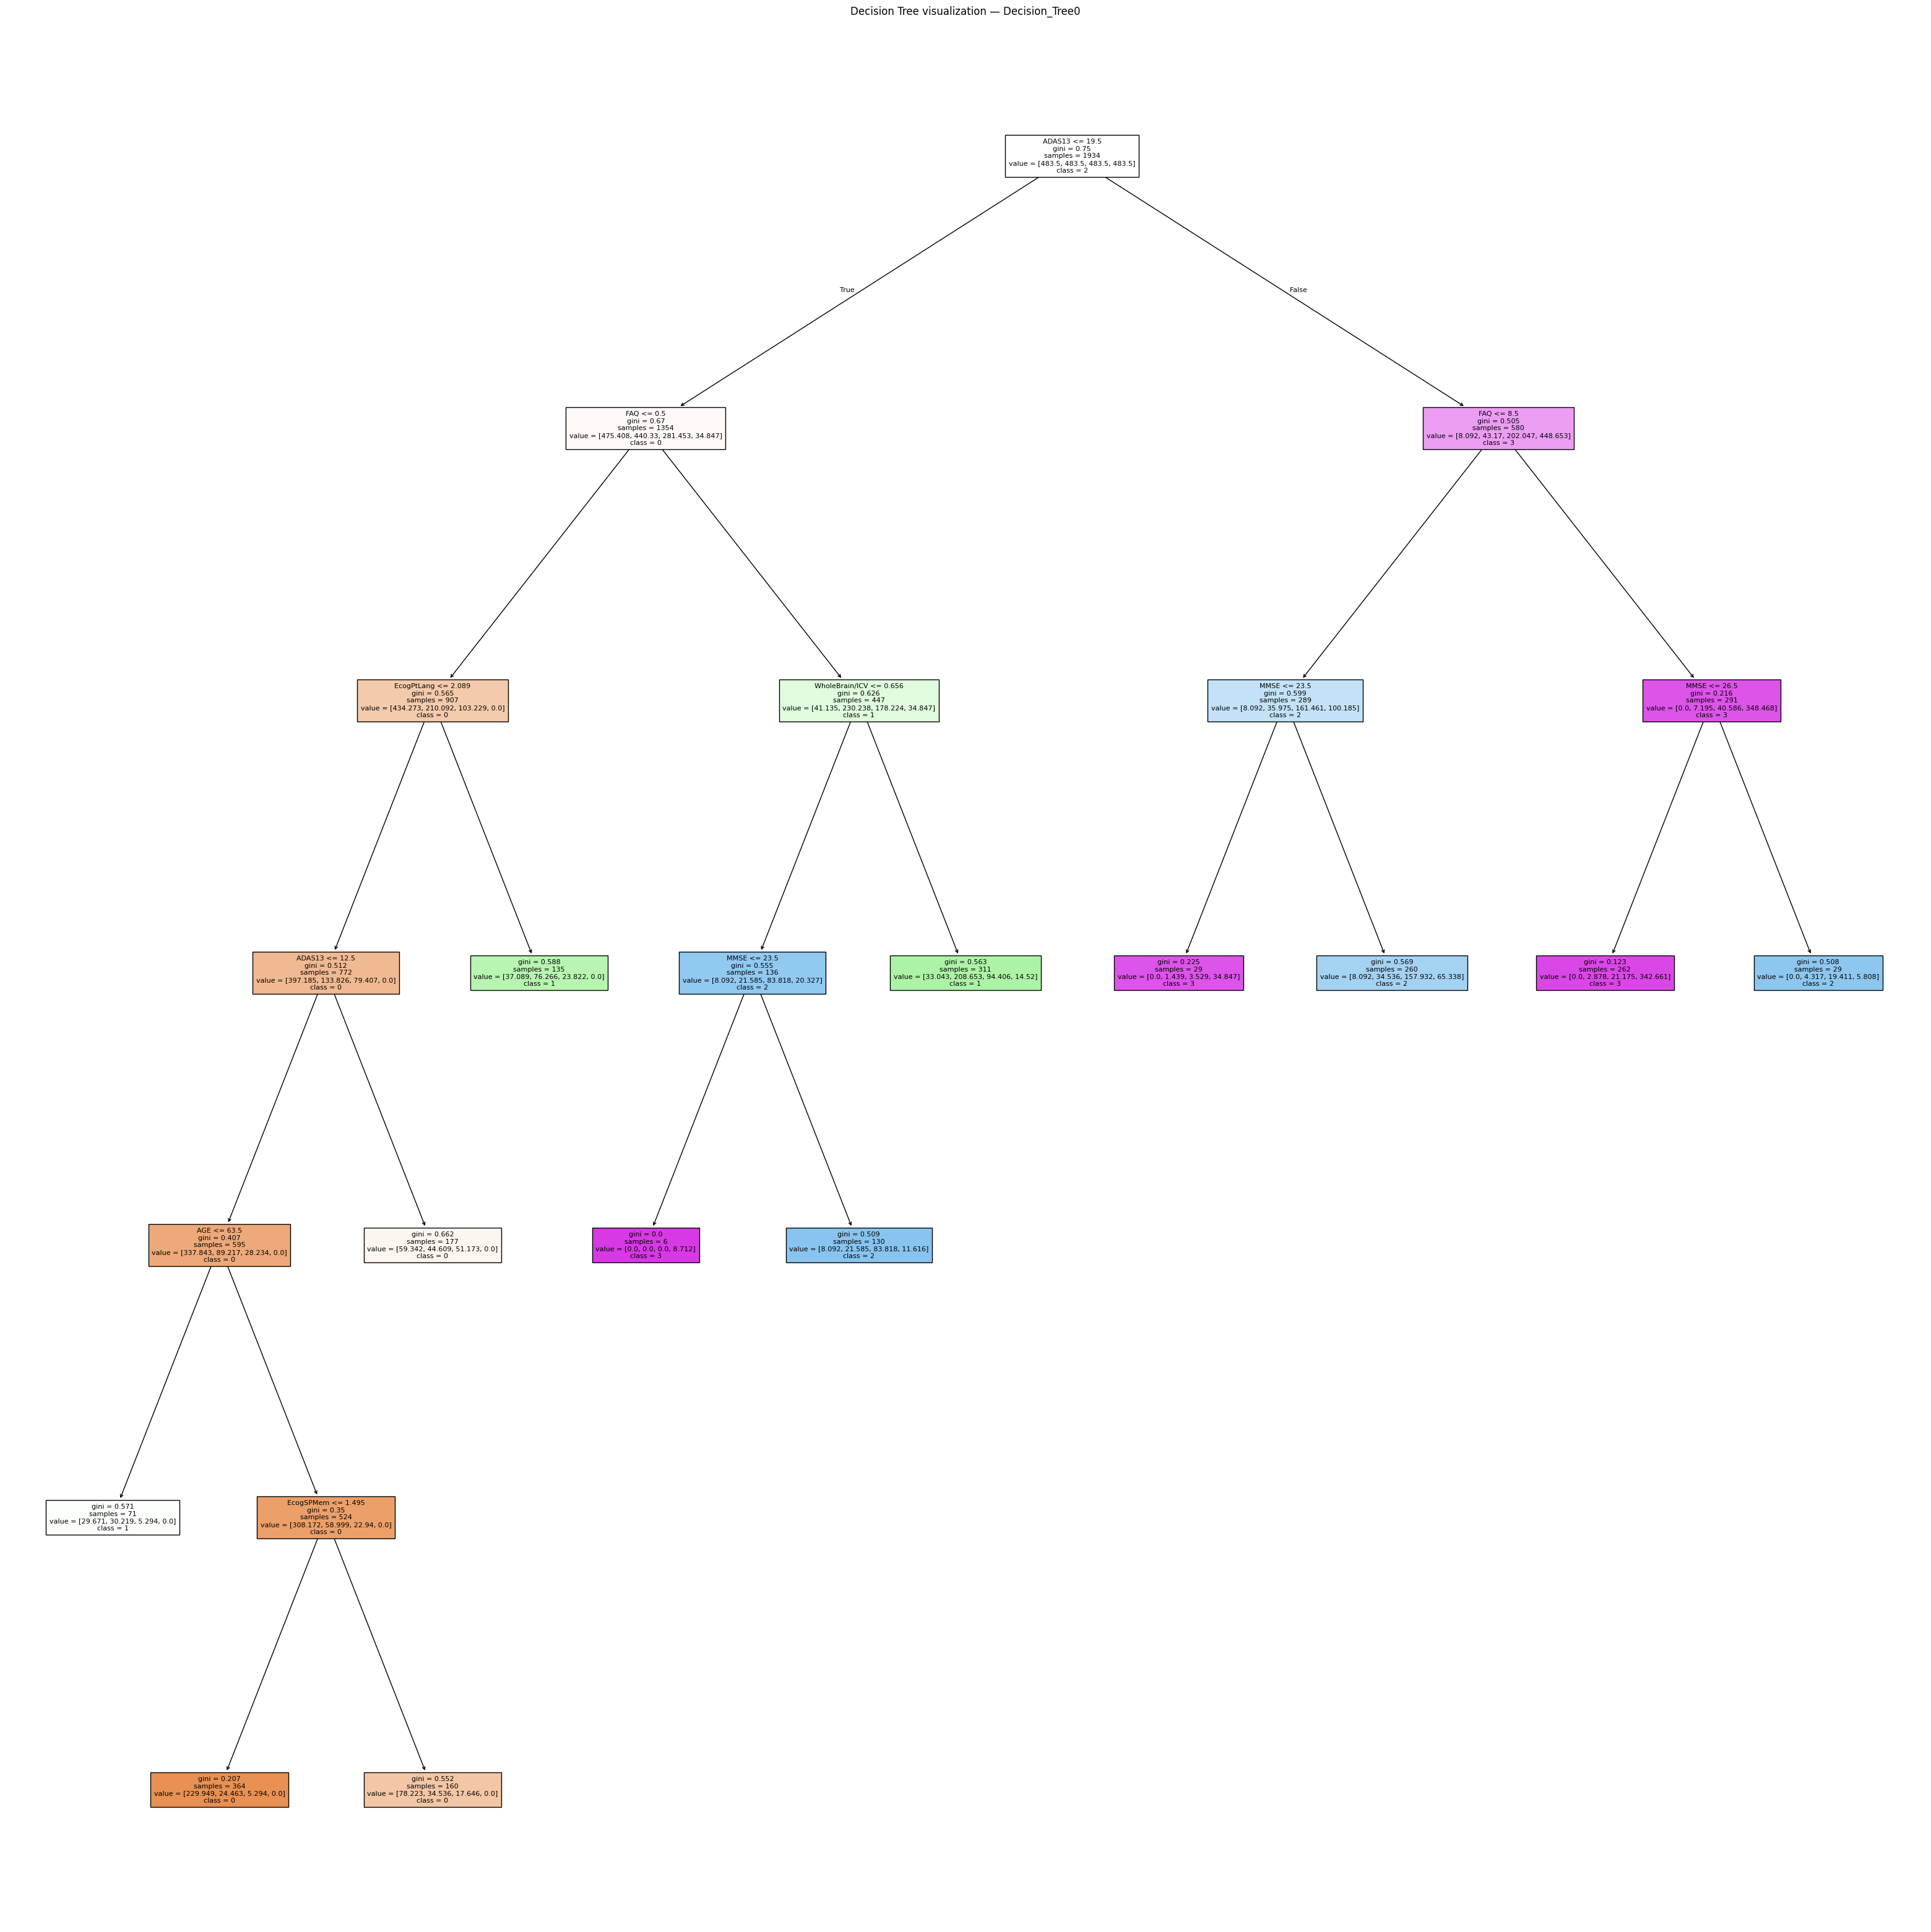

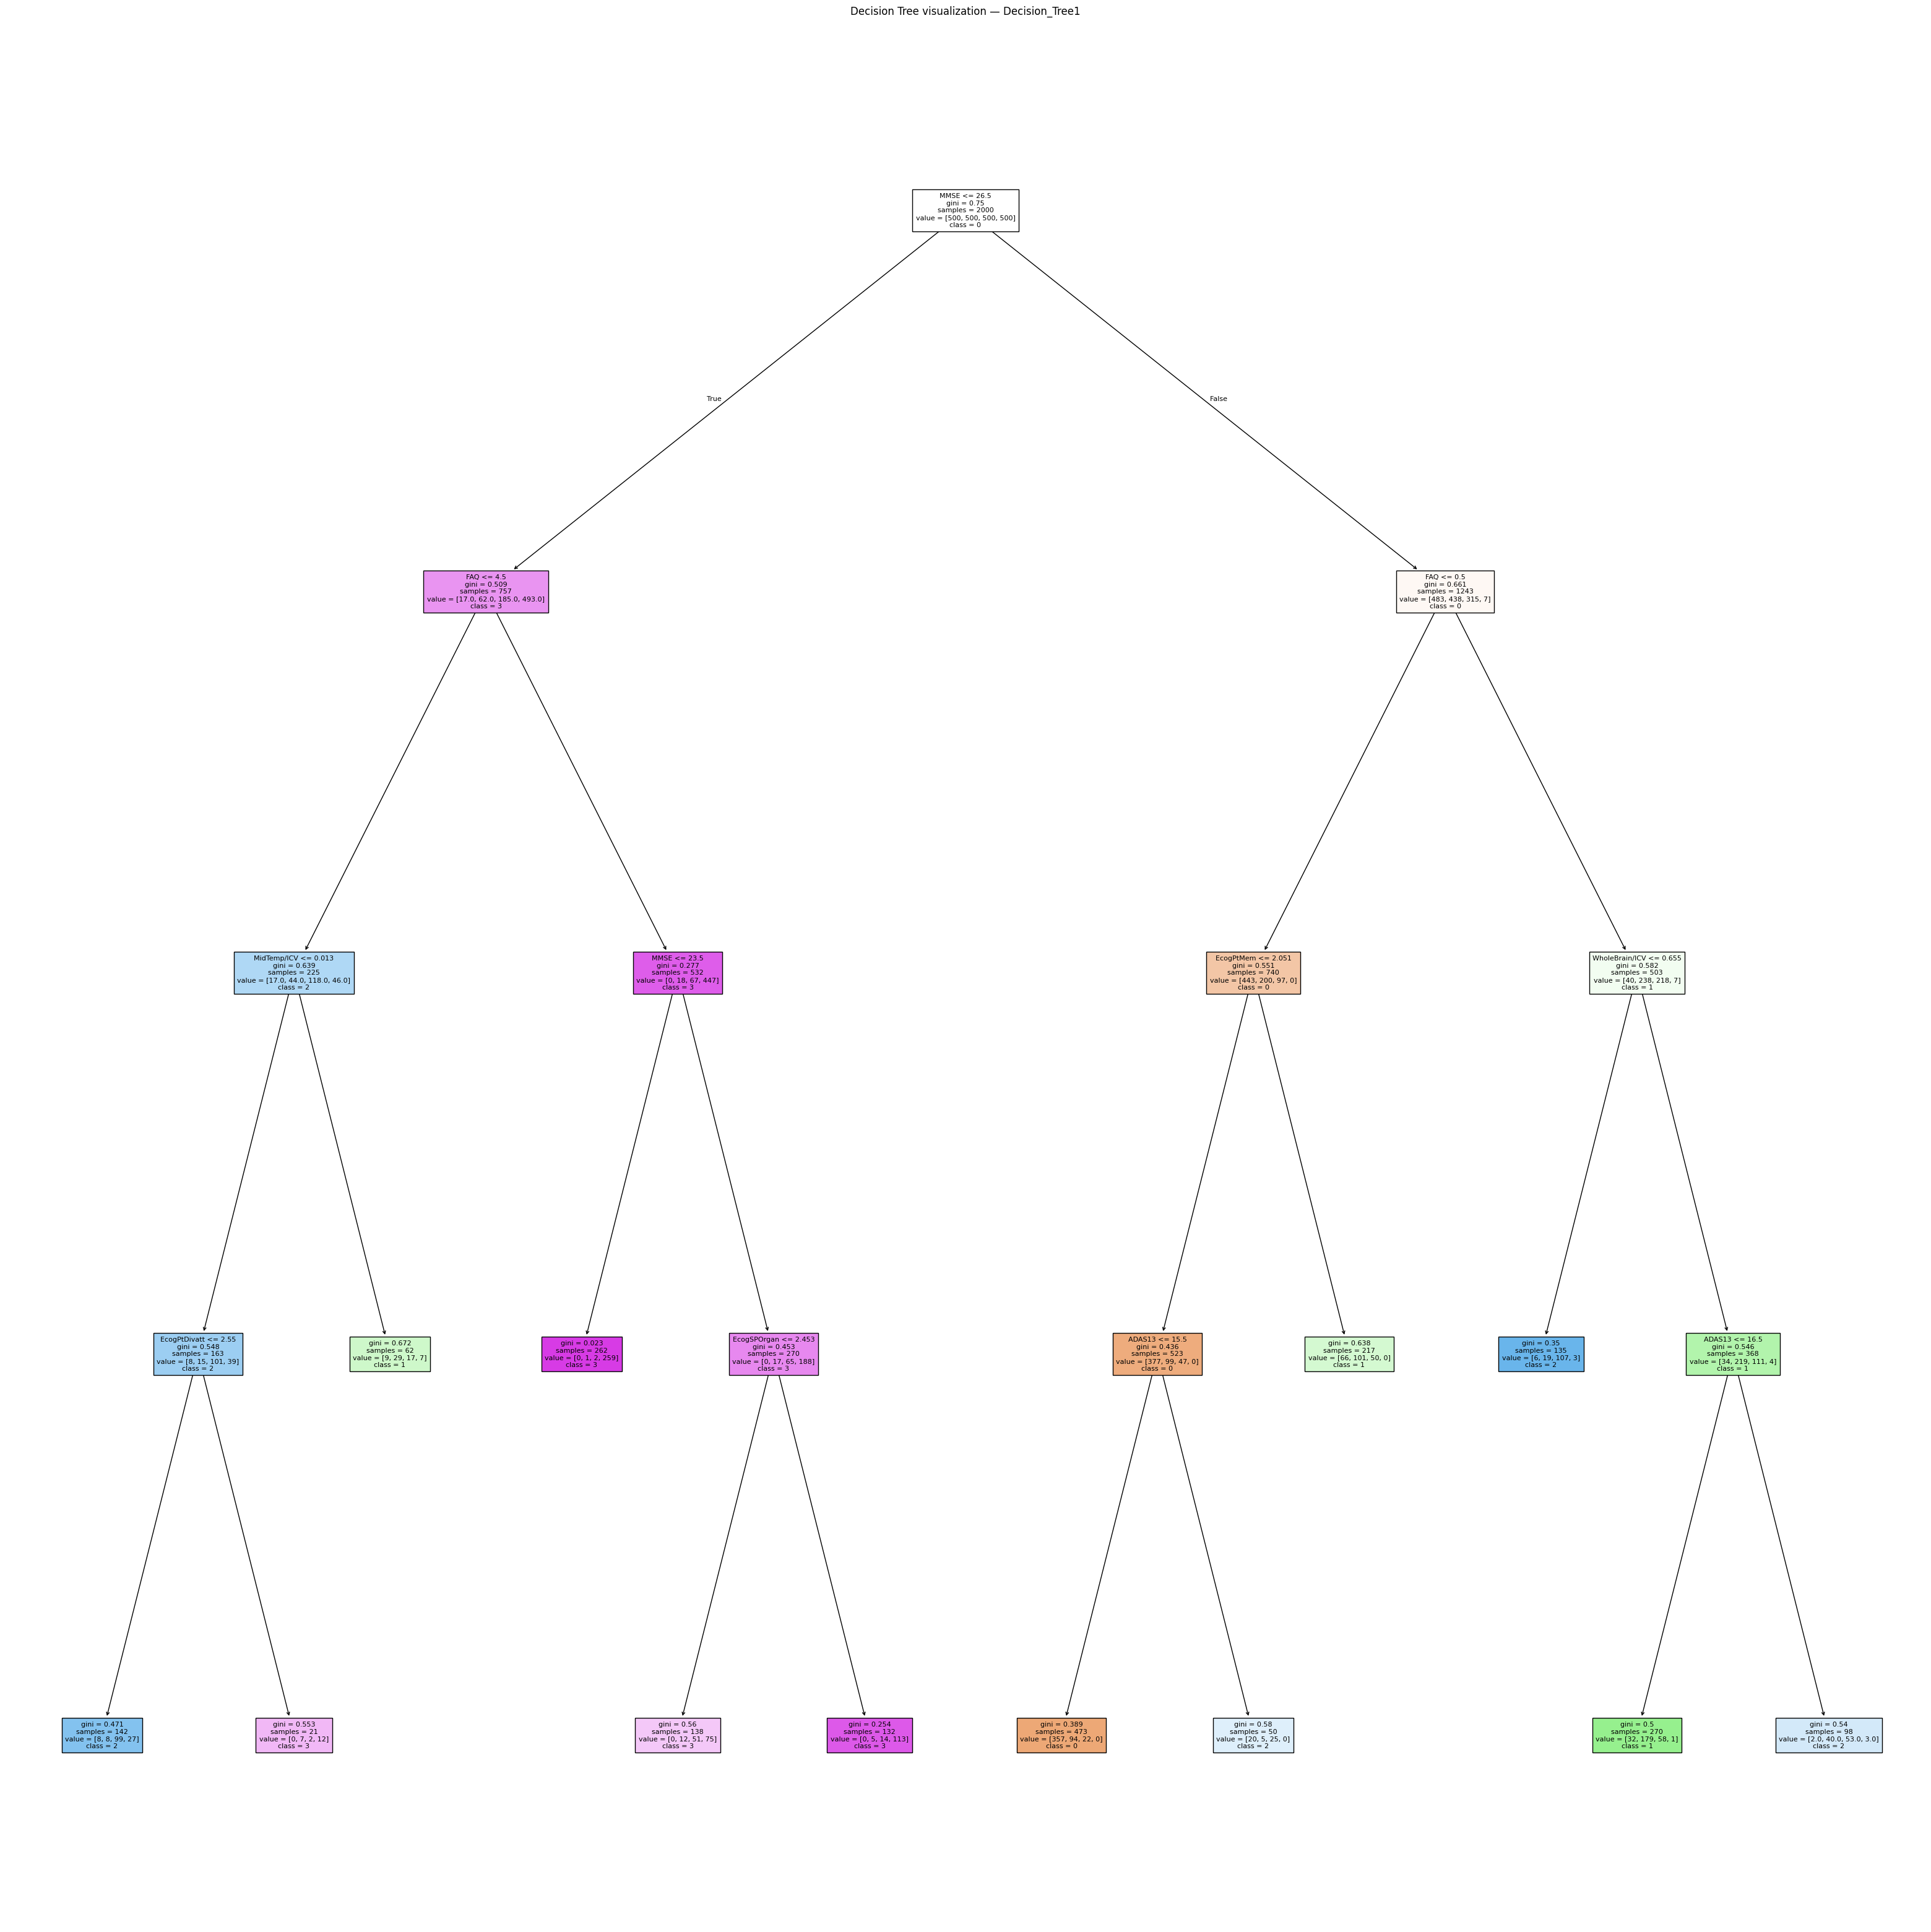

In [5]:
# Generate SHAP summary plots
explainer2.plot_decision_trees(fontsize=8)

When excluding the three strongest features (`CDRSB`, `LDELTOTAL`, and `mPACCdigit`), the models must "rebalance" on other variables. The **SHAP** plots show that:
- `MMSE` becomes the most important feature in most models, assuming a central role.
- `EcogSPMem` was previously important, but here it becomes central;
- `FAQ` emerges with significant weight, often second only to ADAS11.
- `ADAS13` gains importance, especially in boosting models.
- `AGE` and `PTEDUCAT` acquire slightly greater influence than in the previous scenario, due to the lack of strong clinical predictors.

In the ensemble models, the distribution of importance is more balanced: no single variable dominates as `CDRSB` did in the first set. 

The decision trees now show deeper and more varied structures. This indicates that the classification becomes more complex and less "direct." *PDF versions in "results" folder are more readable*.